# Business Analytics - Final Project

### Nicolás López and Ricardo Cuadrado

In [101]:
# Importing all necesary libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import backward_elimination, forward_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.datasets import load_iris
from scipy.stats import randint

In [102]:
# Reading dataset, include encoding to solve Uft-8 error
data =pd.read_csv("cardiovascular_disease.csv", encoding="ISO-8859-1")

C:\Users\enlop\AppData\Local\Temp\ipykernel_6640\1791082881.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("cardiovascular_disease.csv", encoding="ISO-8859-1")


In [103]:
# Create a copy of the data set to work with
df = data

# Display the copy of the data set
df.head()

,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


### 1. Perform an Exploratory Data Analysis (EDA) in Python, you must include at least the following points:

1.1 Give a general description of the database, including size, data types, null/blank values,
outliers, atypical values

In [105]:
# We use the function .shape to see the number of rows and columns
print("Dataframe size: ", df.shape)

Dataframe size:  (308854, 19)


In [106]:
# we use the function .dtypes to see the type of variables
print("type of data: ")
print(df.dtypes)

type of data: 
General_Health                   object
Checkup                          object
Exercise                         object
Heart Disease                    object
Skin Cancer                      object
Other Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age Category                     object
Height (cm)                       int64
Weight (kg)                     float64
BMI                             float64
Smoking History                  object
Alcohol Consumption               int64
Fruit Consumption                object
Green_Vegetables_Consumption      int64
FriedPotato Consumption           int64
dtype: object


In [107]:
df['Fruit Consumption'] = pd.to_numeric(df['Fruit Consumption'], errors='coerce')

In [108]:
# now we use the function isnull and .sum to add the number of null values per columns
print("Null values: ")
print(df.isnull().sum())

Null values: 
General_Health                     0
Checkup                            0
Exercise                         101
Heart Disease                      0
Skin Cancer                        0
Other Cancer                       0
Depression                      3088
Diabetes                           0
Arthritis                          0
Sex                                0
Age Category                       0
Height (cm)                        0
Weight (kg)                        0
BMI                                0
Smoking History                    0
Alcohol Consumption                0
Fruit Consumption                  7
Green_Vegetables_Consumption       0
FriedPotato Consumption            0
dtype: int64


In [109]:
# we use the function .info to summarize all the previous information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308753 non-null  object 
 3   Heart Disease                 308854 non-null  object 
 4   Skin Cancer                   308854 non-null  object 
 5   Other Cancer                  308854 non-null  object 
 6   Depression                    305766 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age Category                  308854 non-null  object 
 11  Height (cm)                   308854 non-null  int64  
 12  Weight (kg)                   308854 non-nul

In [110]:
# we create a new variable to store all categorical variables to see each categories and find anomalies 
categorical_cols = df.select_dtypes(include=['object']).columns

# we create a loop to find the categories and its frecuency
for col in categorical_cols:
    freq_count = df[col].value_counts()
    # we print the result
    print(f"\n{col}:")
    print(freq_count)


General_Health:
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

Checkup:
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

Exercise:
Yes    239304
No      69449
Name: Exercise, dtype: int64

Heart Disease:
No     283882
Yes     24971
e           1
Name: Heart Disease, dtype: int64

Skin Cancer:
No            278853
Yes            29992
wet                2
dsfg               1
12*lkl«fg         1
q345345            1
serter-89          1
dfg 025            1
dfgklfg-          1
sertret-8          1
Name: Skin Cancer, dtype: int64

Other Cancer:
No        278975
Yes        29878
dsgw45         1
Name: Other Cancer, dtype: int64

Depression:
No     244491
Yes     61275
Name: Depression, dtype: int64

Diabetes:
No                                        

In [111]:
df = df.drop(df[df['Heart Disease'] == 'e'].index)
df = df.drop(df[df['Skin Cancer'] == 'wet'].index)
df = df.drop(df[df['Skin Cancer'] == 'dsfg'].index)
df = df.drop(df[df['Skin Cancer'] == '12*lkl«fg'].index)
df = df.drop(df[df['Skin Cancer'] == 'q345345'].index)
df = df.drop(df[df['Skin Cancer'] == 'serter-89'].index)
df = df.drop(df[df['Skin Cancer'] == 'dfg 025'].index)
df = df.drop(df[df['Skin Cancer'] == 'dfgklfg-'].index)
df = df.drop(df[df['Skin Cancer'] == 'sertret-8'].index)
df = df.drop(df[df['Other Cancer'] == 'dsgw45'].index)

In [112]:
df = df.dropna(subset=['Fruit Consumption'])

1.2 Detail the criteria used to detect outliers, and how where the outliers and null values
handled (if applicable): What was done with them? Why? etc.

In [113]:
# we create a copy for the new dataframe to see null values for cuantiative variable
df_1 = df

In [114]:
# For the null values in the depression column we replace them with the mode
mode_depression = df['Depression'].mode()[0]
df['Depression'].fillna(mode_depression, inplace=True)

In [115]:
# For the null values in the exercise column we replace them with the mode
mode_exercise = df['Exercise'].mode()[0]
df['Exercise'].fillna(mode_exercise, inplace=True)

In [116]:
# For the null values in fruit cosumption we replace them with the mean
mean_fc = df['Fruit Consumption'].mean()
df['Fruit Consumption'].fillna(mean_fc, inplace=True)

In [117]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart Disease                   0
Skin Cancer                     0
Other Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age Category                    0
Height (cm)                     0
Weight (kg)                     0
BMI                             0
Smoking History                 0
Alcohol Consumption             0
Fruit Consumption               0
Green_Vegetables_Consumption    0
FriedPotato Consumption         0
dtype: int64

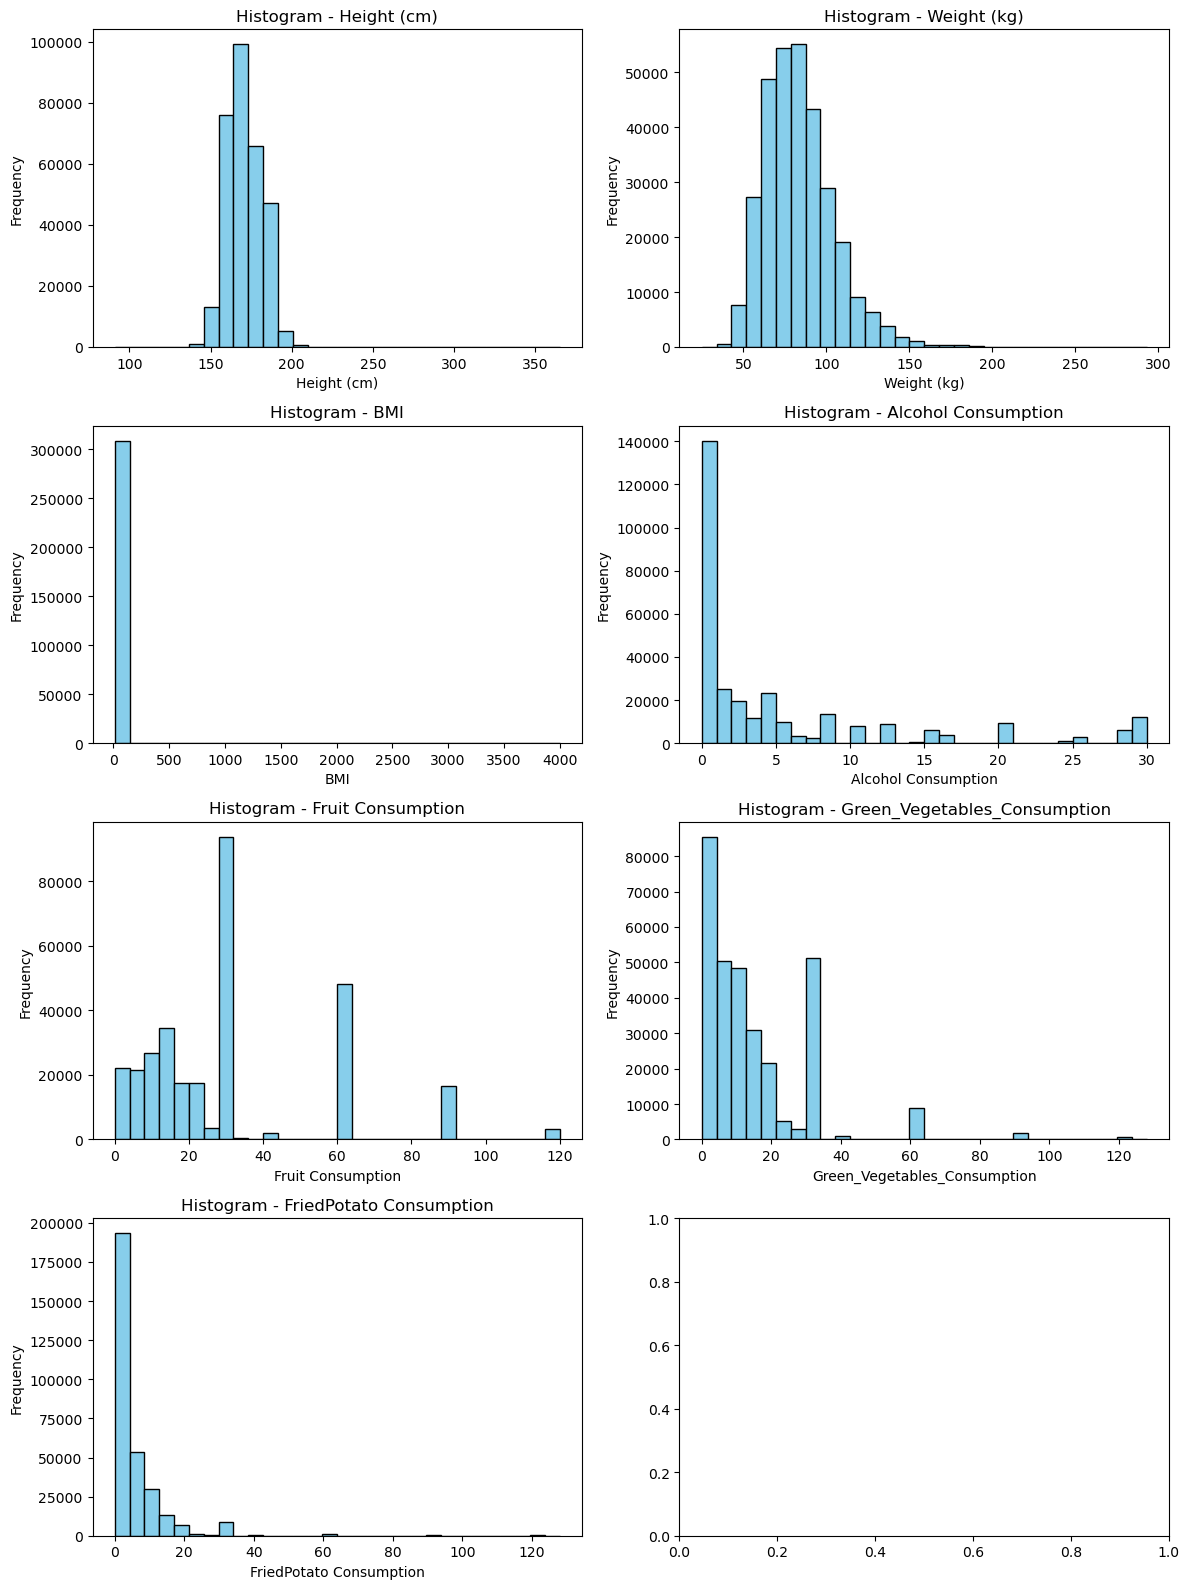

In [118]:
# to see atipical values we graph a histogram for all the numerical variables
col_n = df.select_dtypes(include='number').columns

# we set the size of the plot according the number of columns
num_columns = len(col_n)
num_rows = num_columns // 2 + num_columns % 2
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

if num_rows == 1:
    axs = axs.reshape(1,-1)

# we create the histograms using a loop

for i, column in enumerate(col_n):
    row, col = divmod(i, 2)
    axs[row, col].hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axs[row, col].set_title(f'Histogram - {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Ajustar el diseño y mostrar los histogramas
plt.tight_layout()
plt.show()

In [119]:
# Supongamos que tienes un DataFrame 'df' con una columna 'score'
Q1 = df['Height (cm)'].quantile(0.10)
Q3 = df['Height (cm)'].quantile(0.90)
IQR = Q3 - Q1

# Filtrar los datos sin outliers
df = df[(df['Height (cm)'] >= Q1 - 1.5 * IQR) & (df['Height (cm)'] <= Q3 + 1.5 * IQR)]

# Supongamos que tienes un DataFrame 'df' con una columna 'score'
Q1 = df['Weight (kg)'].quantile(0.10)
Q3 = df['Weight (kg)'].quantile(0.90)
IQR = Q3 - Q1

# Filtrar los datos sin outliers
df = df[(df['Weight (kg)'] >= Q1 - 1.5 * IQR) & (df['Weight (kg)'] <= Q3 + 1.5 * IQR)]

# Supongamos que tienes un DataFrame 'df' con una columna 'score'
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos sin outliers
df = df[(df['BMI'] >= Q1 - 1.5 * IQR) & (df['BMI'] <= Q3 + 1.5 * IQR)]

# Supongamos que tienes un DataFrame 'df' con una columna 'score'
Q1 = df['Fruit Consumption'].quantile(0.10)
Q3 = df['Fruit Consumption'].quantile(0.90)
IQR = Q3 - Q1

# Filtrar los datos sin outliers
df = df[(df['Fruit Consumption'] >= Q1 - 1.5 * IQR) & (df['Alcohol Consumption'] <= Q3 + 1.5 * IQR)]

# Supongamos que tienes un DataFrame 'df' con una columna 'score'
Q1 = df['Alcohol Consumption'].quantile(0.10)
Q3 = df['Alcohol Consumption'].quantile(0.90)
IQR = Q3 - Q1

# Filtrar los datos sin outliers
df = df[(df['Alcohol Consumption'] >= Q1 - 1.5 * IQR) & (df['Alcohol Consumption'] <= Q3 + 1.5 * IQR)]

# Supongamos que tienes un DataFrame 'df' con una columna 'score'
Q1 = df['Green_Vegetables_Consumption'].quantile(0.10)
Q3 = df['Green_Vegetables_Consumption'].quantile(0.90)
IQR = Q3 - Q1

# Filtrar los datos sin outliers
df = df[(df['Green_Vegetables_Consumption'] >= Q1 - 1.5 * IQR) & (df['Green_Vegetables_Consumption'] <= Q3 + 1.5 * IQR)]

# Supongamos que tienes un DataFrame 'df' con una columna 'score'
Q1 = df['FriedPotato Consumption'].quantile(0.10)
Q3 = df['FriedPotato Consumption'].quantile(0.90)
IQR = Q3 - Q1

# Filtrar los datos sin outliers
df = df[(df['FriedPotato Consumption'] >= Q1 - 1.5 * IQR) & (df['FriedPotato Consumption'] <= Q3 + 1.5 * IQR)]

In [120]:
df.shape

(294301, 19)

In [121]:
df_clean = df

1.3 Explore the correlation between variables. Which variables seem to affect more the
response variable and how? 

In [122]:
#En esta línea crea una lista que contiene los nombres de las columnas del DataFrame df_PublicHospitalData que contienen variables categóricas que queremos convertir en variables ficticias.
var_dummys = ['General_Health', 'Checkup', 'Exercise', 'Heart Disease', 'Skin Cancer', 'Other Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age Category', 'Smoking History']

#Ahora, este código utiliza la función get_dummies() de la biblioteca Pandas para crear variables ficticias para cada columna de la lista creada y las concatena al DataFrame df_PublicHospitalData.
df_clean = pd.get_dummies(df, columns = var_dummys, prefix = var_dummys, drop_first=True)

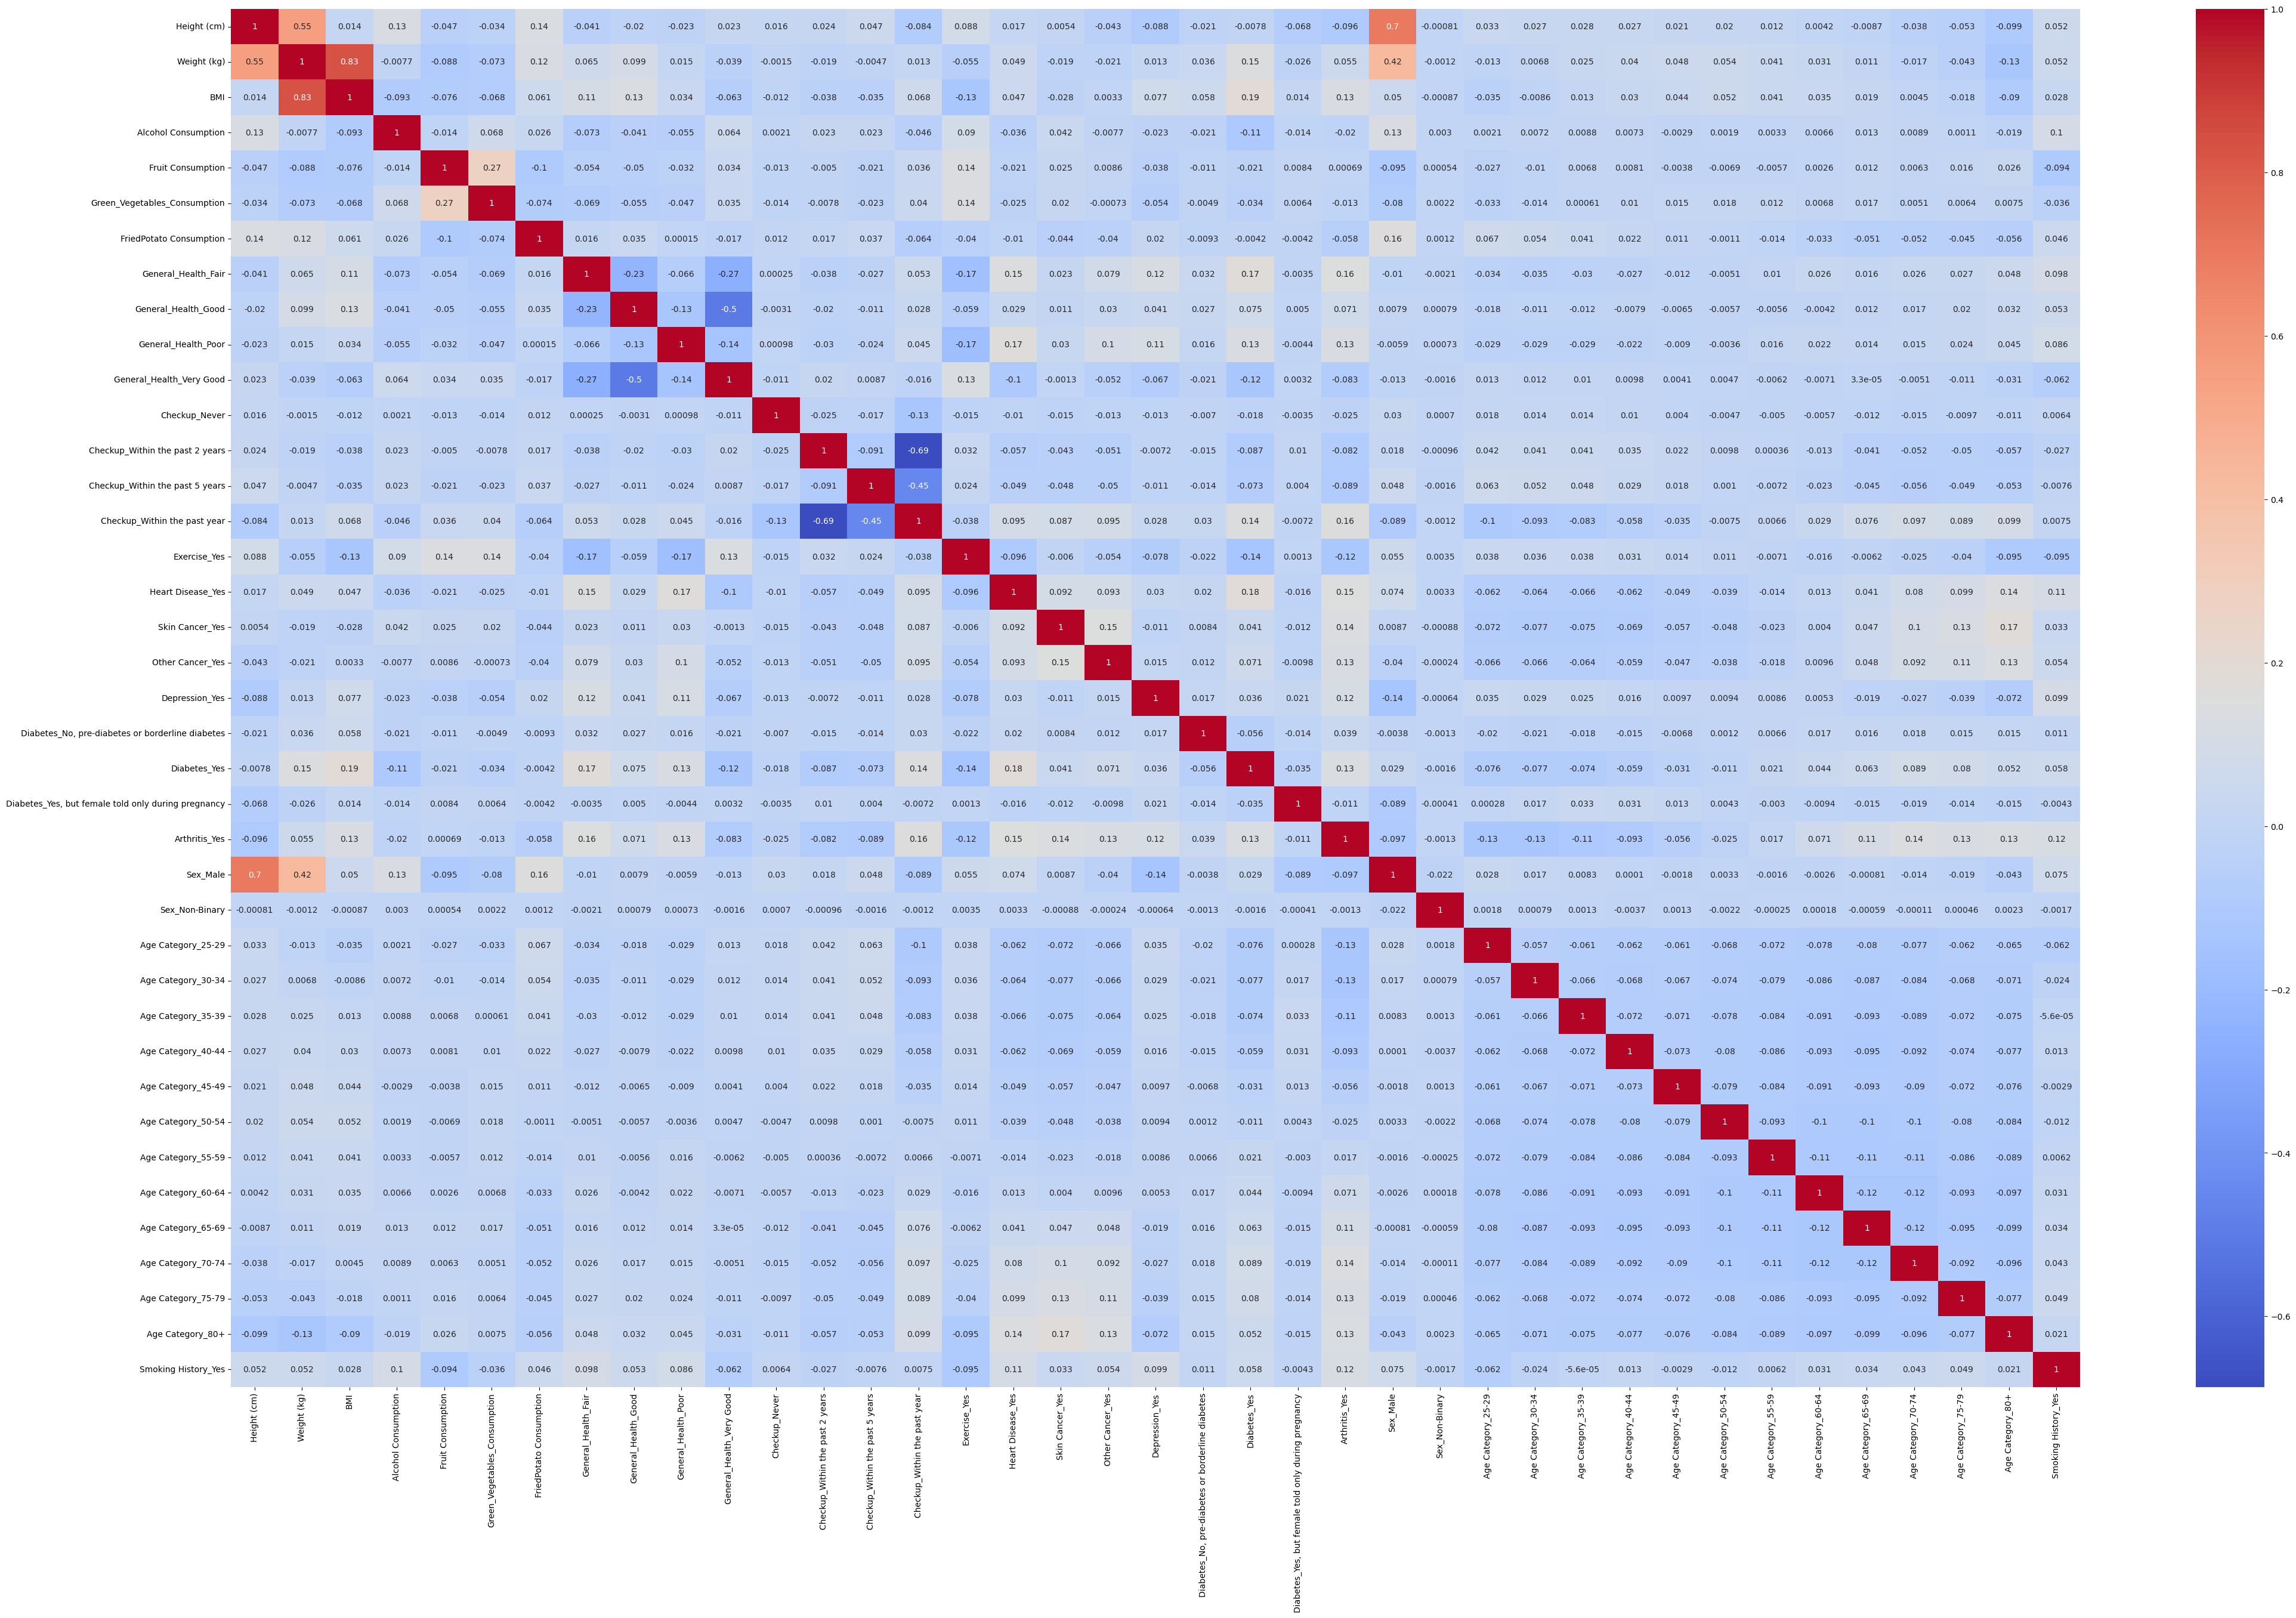

In [123]:
#A correlation Matrix is created 
corr_matrix = df_clean.corr()

#The size of the graph is fitted to the data 
plt.figure(figsize=(50,30))

#The type of graph for the correlation is chosen
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

#The graph is shown
plt.show()

1.4 Data visualization: Visualize all predictor variables and analyze its distributions using
appropriate visualization methods. Analyze the distribution of the response variable.

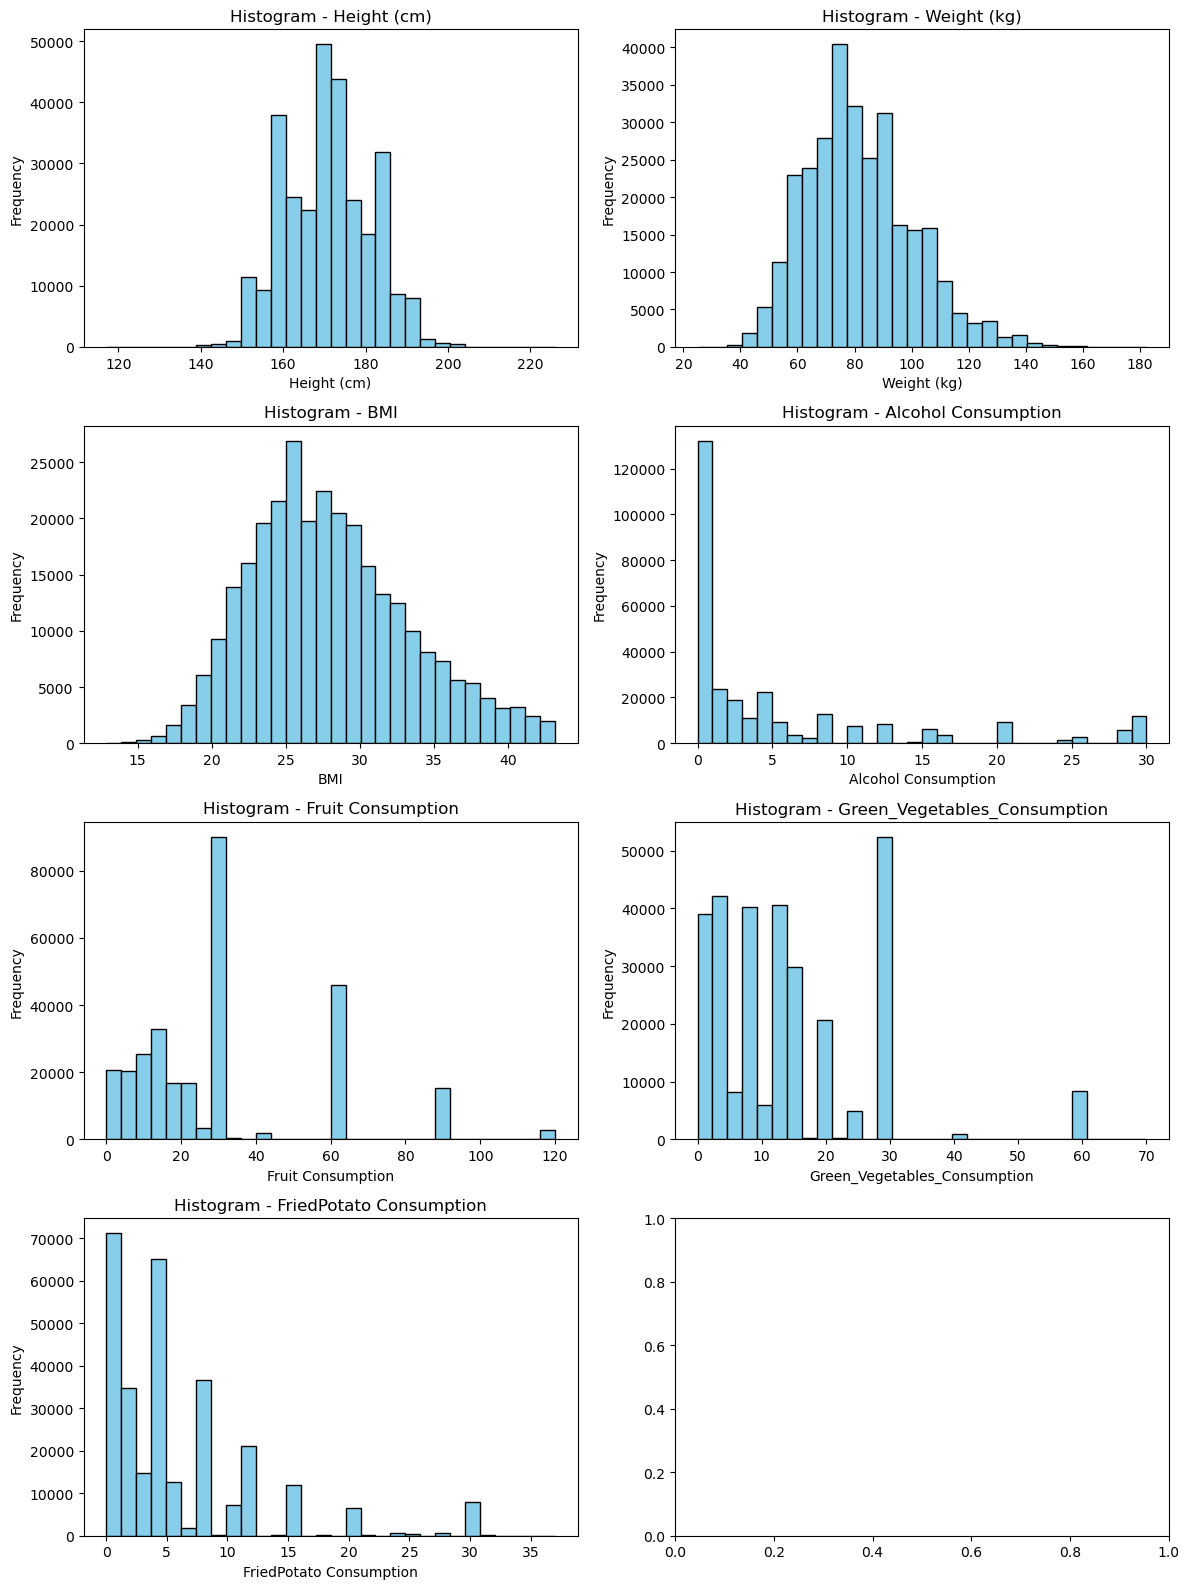

In [124]:
# to see the distrubution after preprocessing
col_n = df.select_dtypes(include='number').columns

# we set the size of the plot according the number of columns
num_columns = len(col_n)
num_rows = num_columns // 2 + num_columns % 2
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

if num_rows == 1:
    axs = axs.reshape(1,-1)

# we create the histograms using a loop

for i, column in enumerate(col_n):
    row, col = divmod(i, 2)
    axs[row, col].hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axs[row, col].set_title(f'Histogram - {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Ajustar el diseño y mostrar los histogramas
plt.tight_layout()
plt.show()

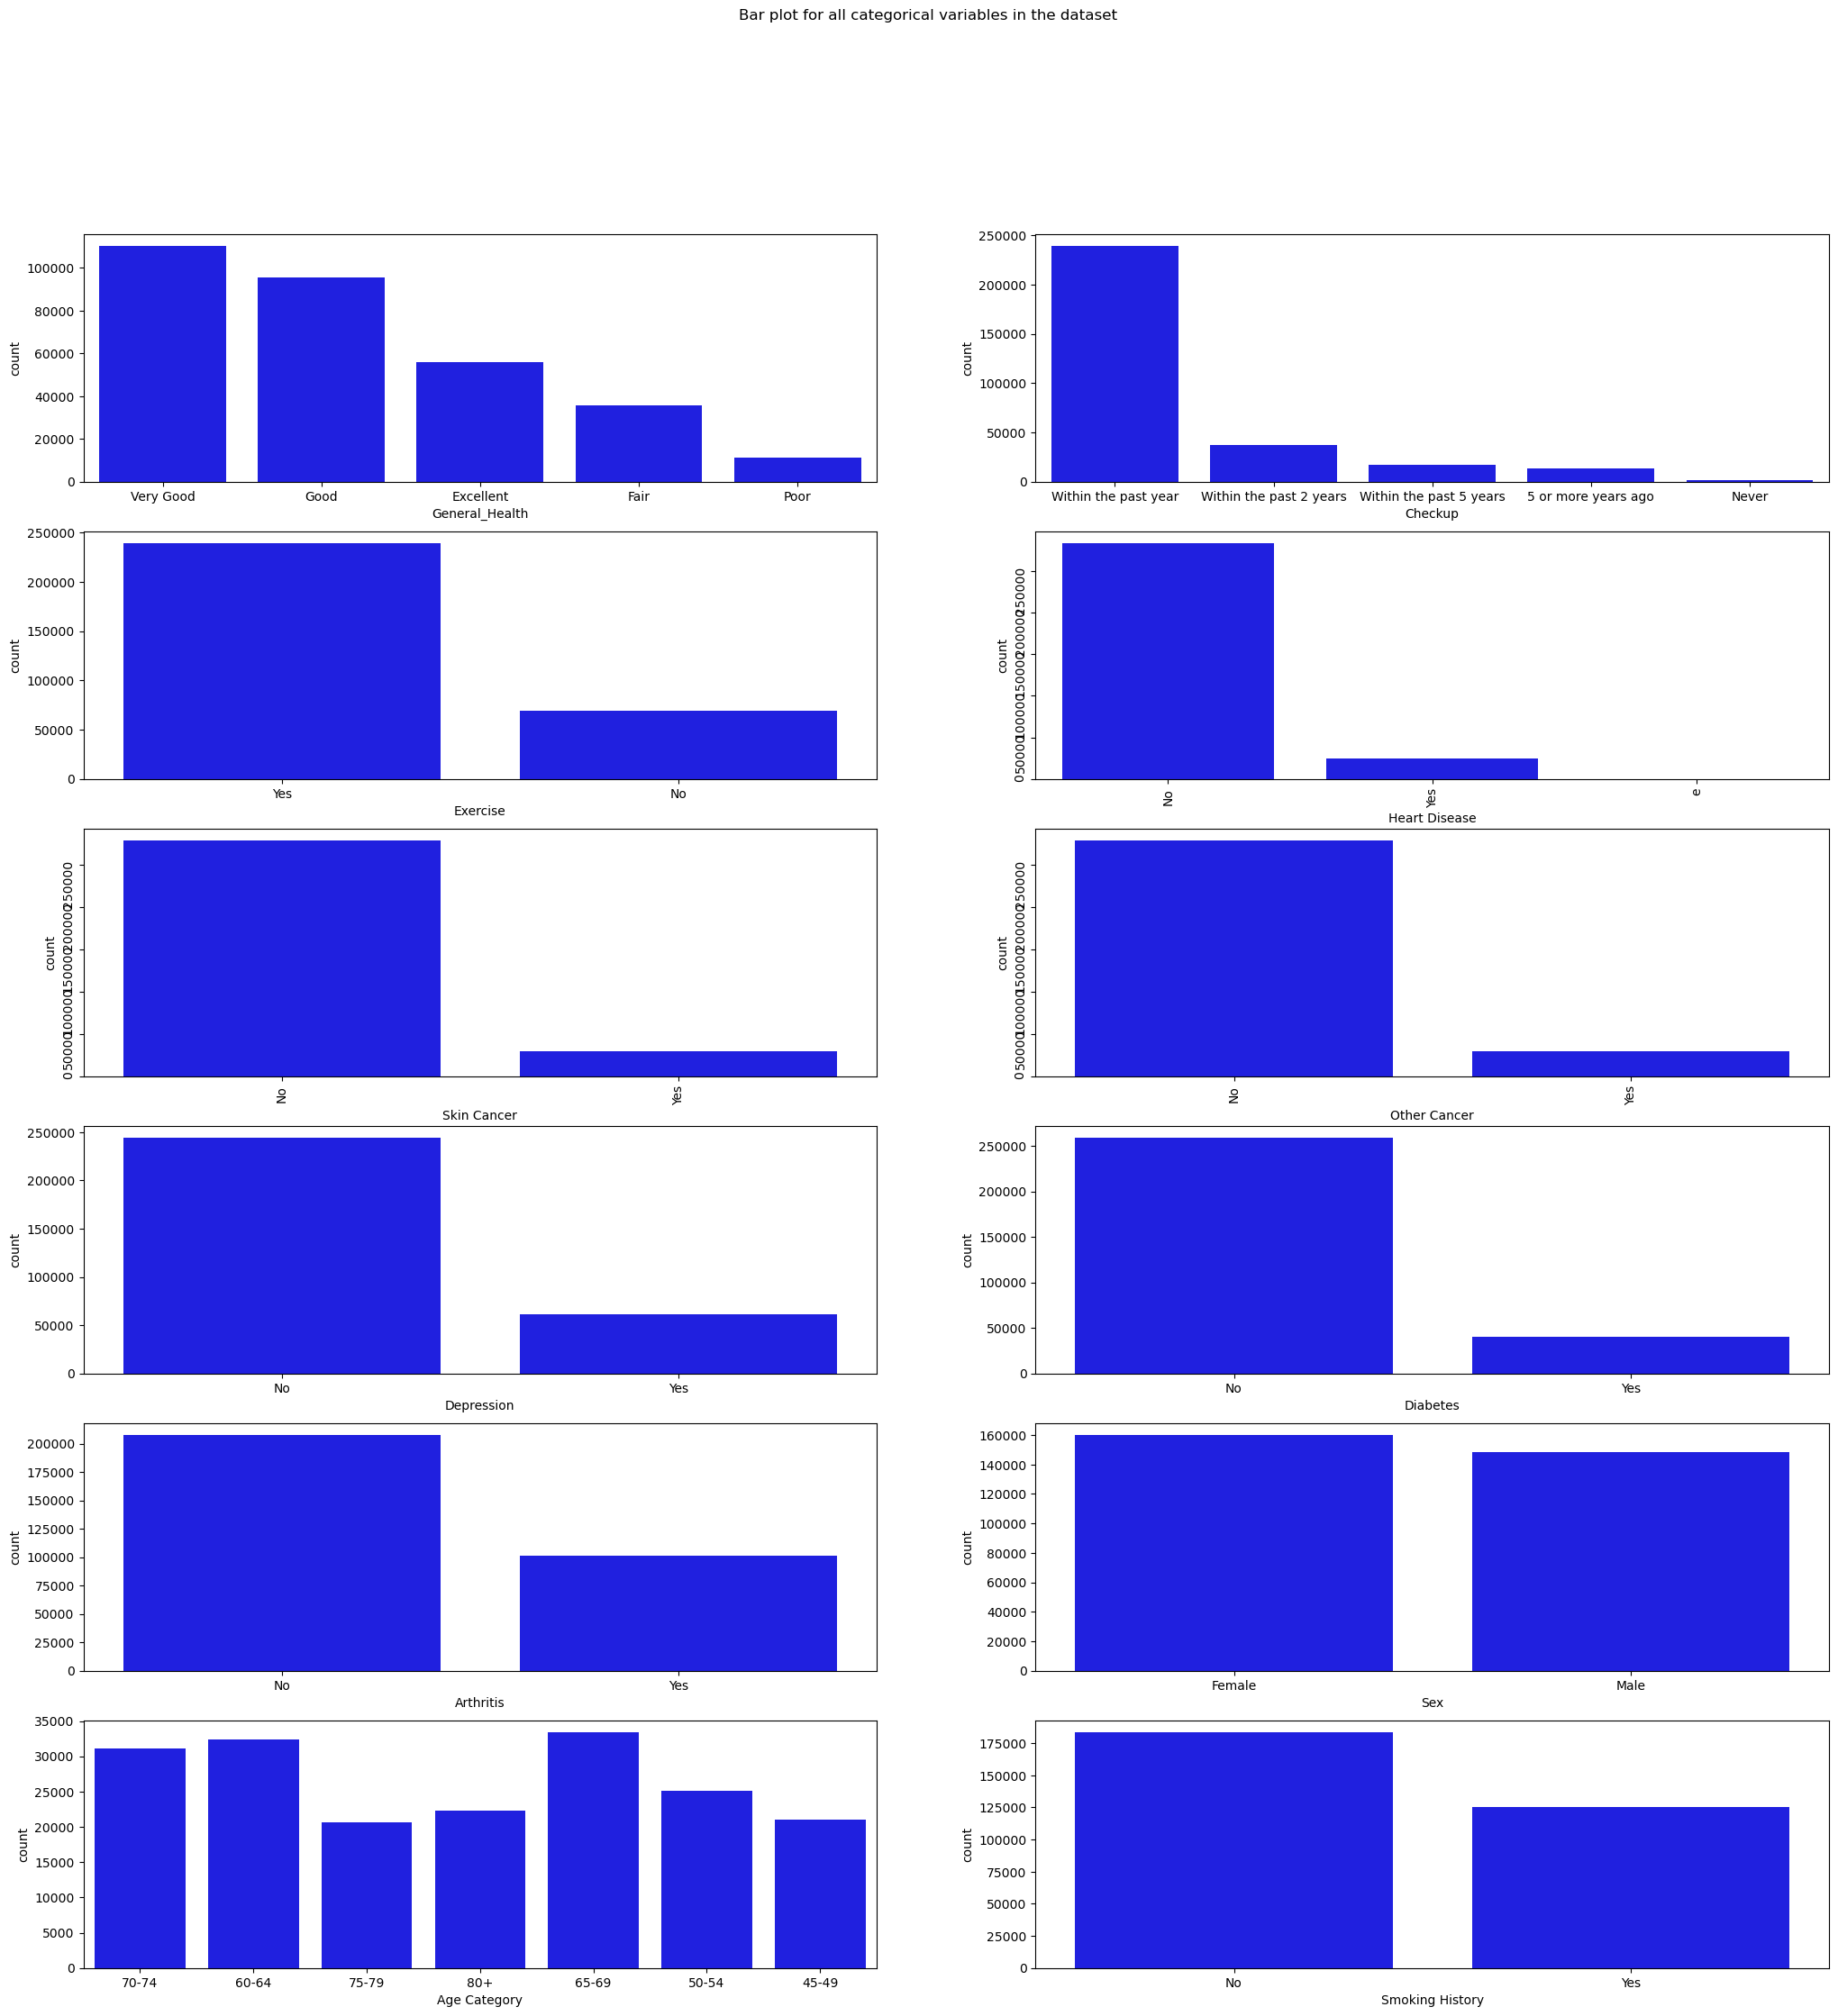

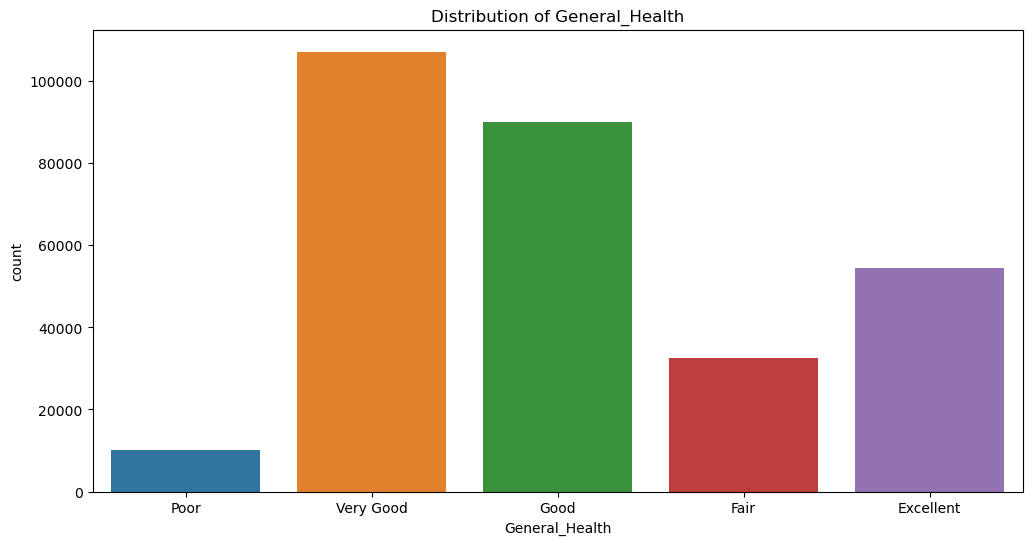

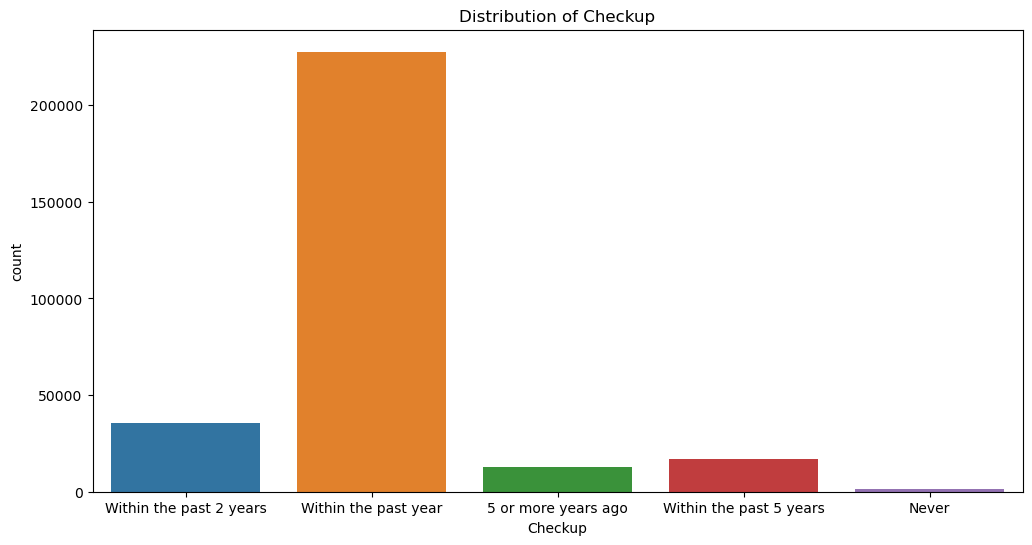

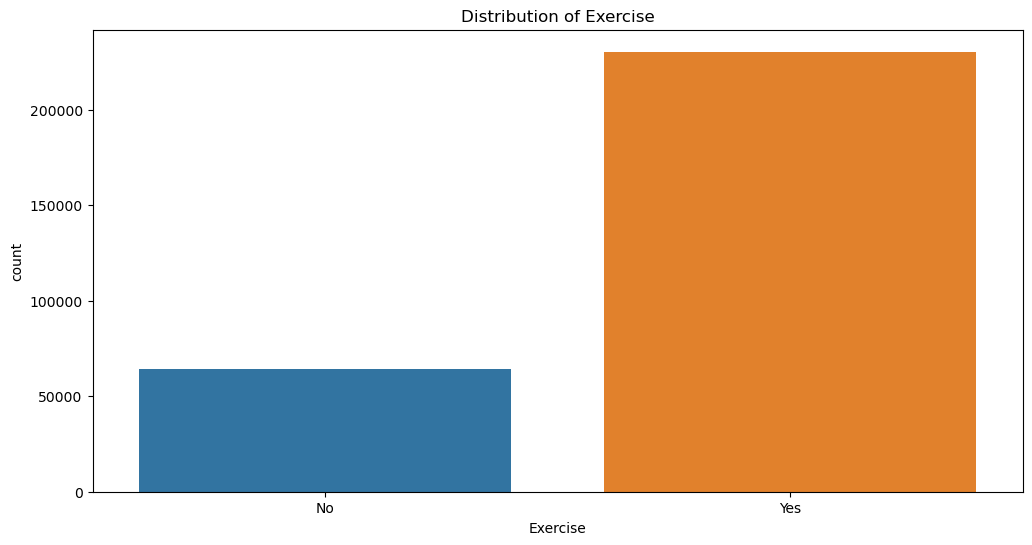

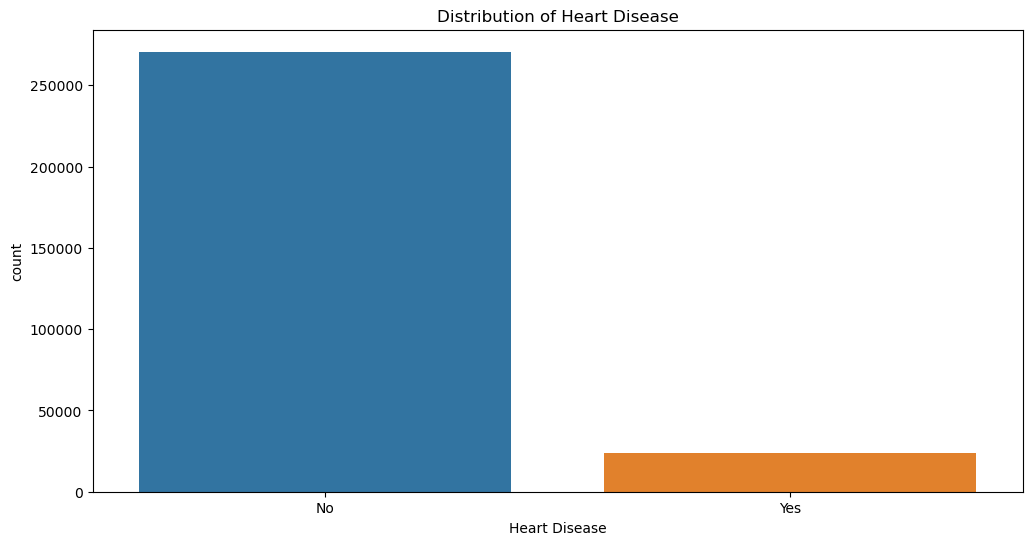

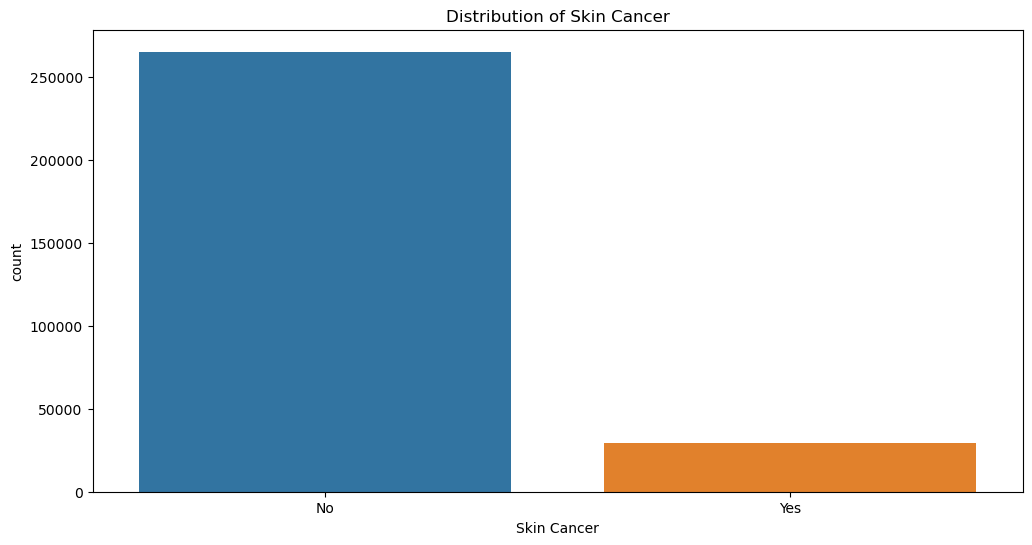

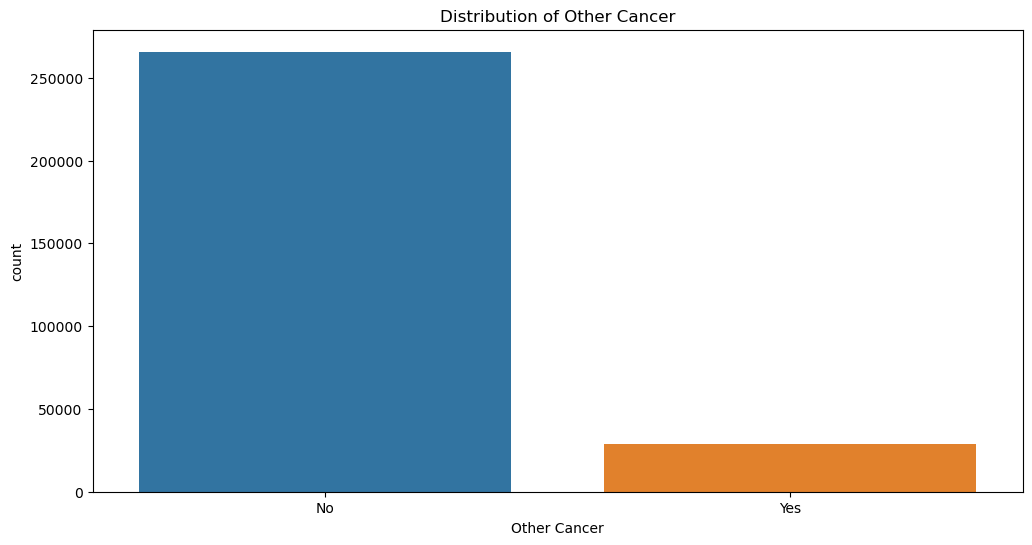

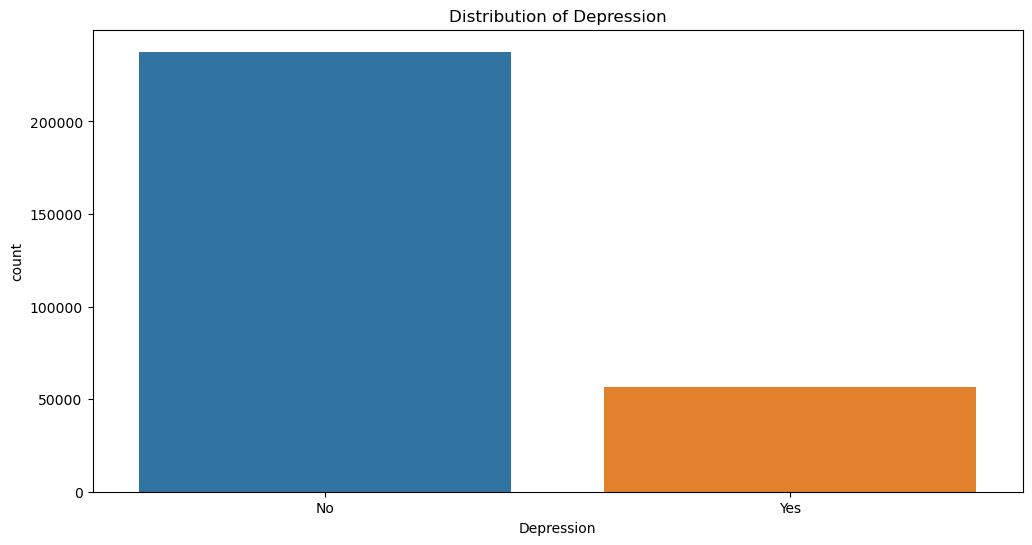

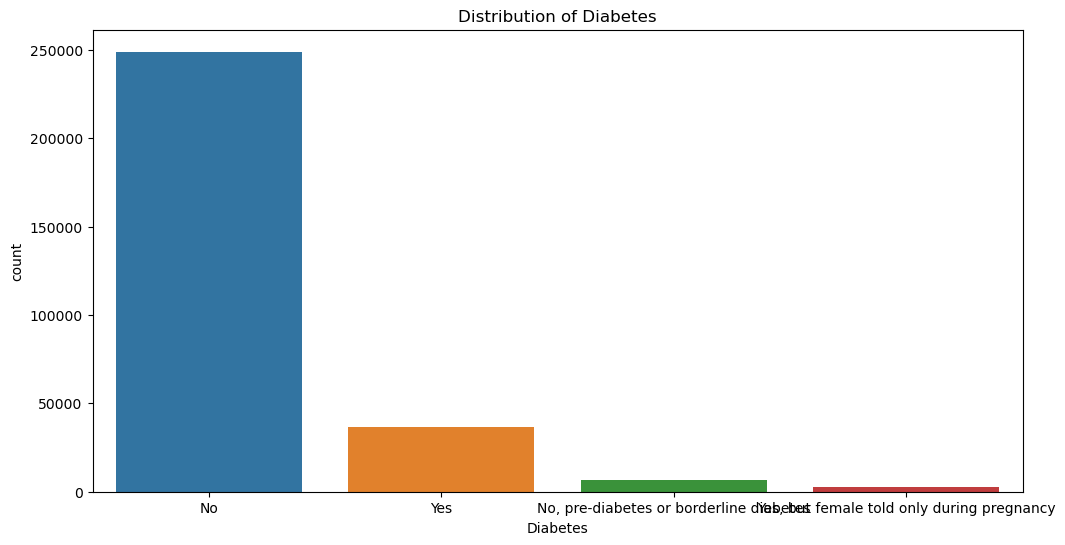

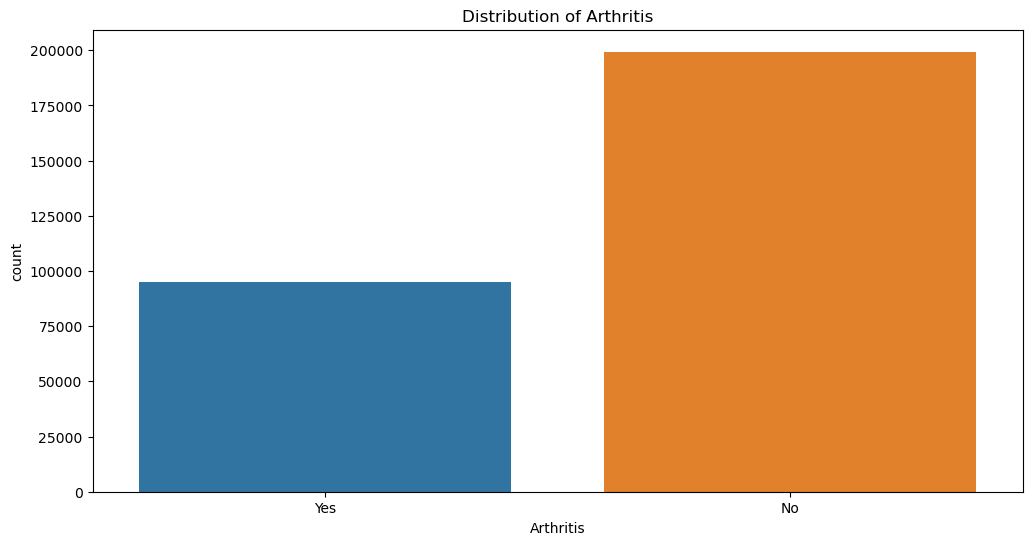

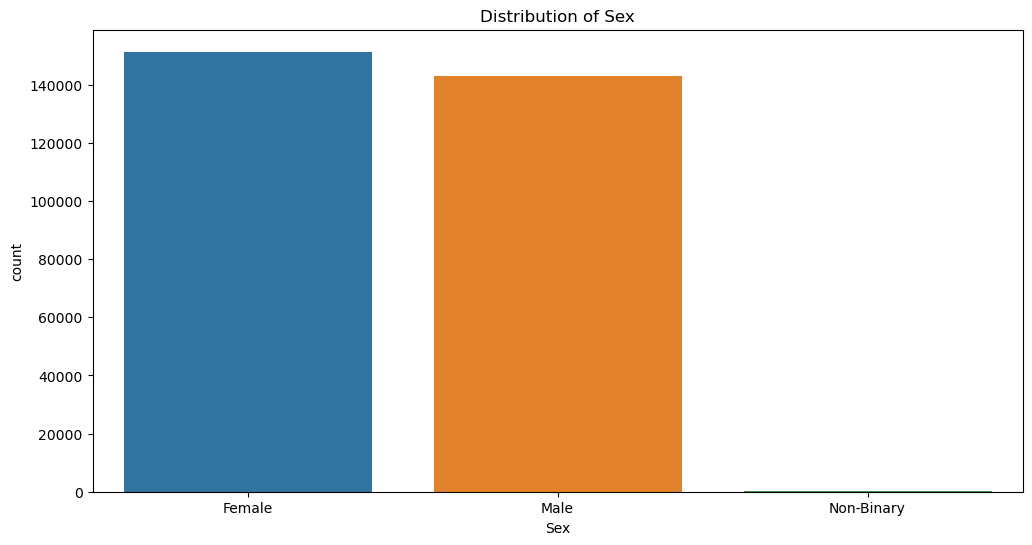

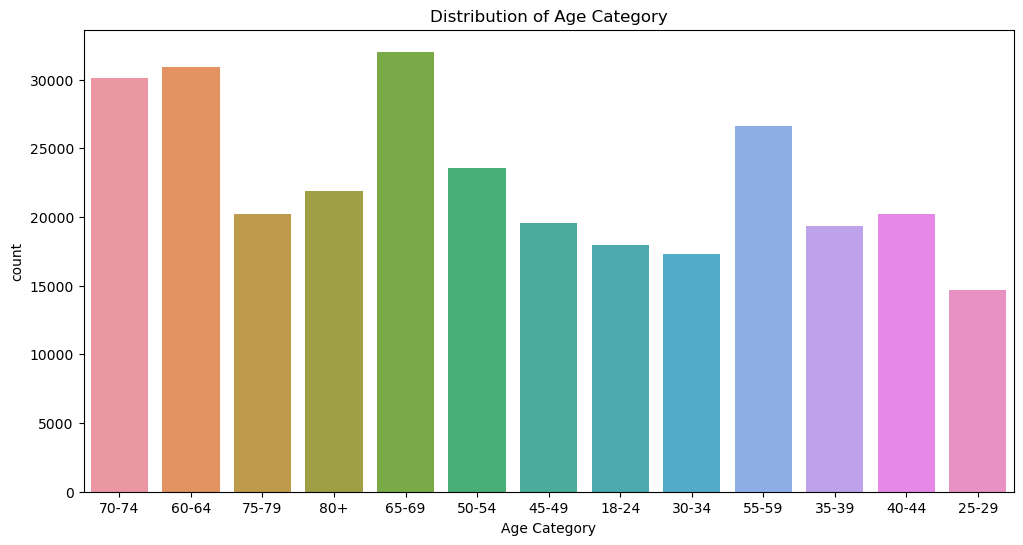

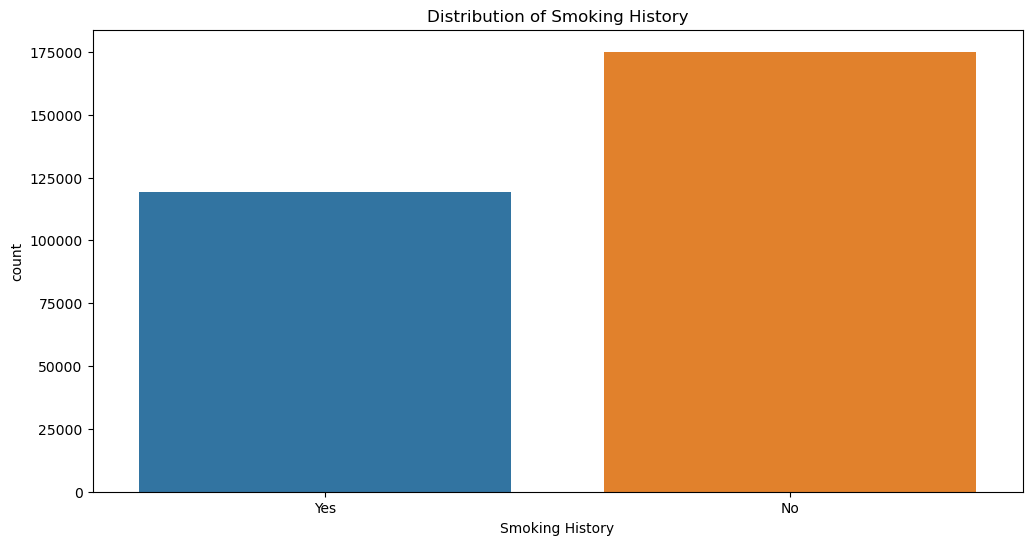

ValueError: Could not interpret input 'Heart Disease_Yes'

<Figure size 800x600 with 0 Axes>

In [125]:
fig, axes = plt.subplots(6, 2, figsize = (25, 25))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'General_Health', data = data, color = 'blue', 
              order = data['General_Health'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'Checkup', data = data, color = 'blue', 
              order = data['Checkup'].value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'Exercise', data = data, color = 'blue', 
              order = data['Exercise'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'Heart Disease', data = data, color = 'blue', 
              order = data['Heart Disease'].value_counts().index);

sns.countplot(ax = axes[2, 0], x = 'Skin Cancer', data = data, color = 'blue', 
              order = data['Skin Cancer'].head(20).value_counts().index);

sns.countplot(ax = axes[2, 1], x = 'Other Cancer', data = data, color = 'blue', 
              order = data['Other Cancer'].head(20).value_counts().index);

sns.countplot(ax = axes[3, 0], x = 'Depression', data = data, color = 'blue', 
              order = data['Depression'].head(20).value_counts().index);

sns.countplot(ax = axes[3, 1], x = 'Diabetes', data = data, color = 'blue', 
              order = data['Diabetes'].head(20).value_counts().index);

sns.countplot(ax = axes[4, 0], x = 'Arthritis', data = data, color = 'blue', 
              order = data['Arthritis'].head(20).value_counts().index);

sns.countplot(ax = axes[4, 1], x = 'Sex', data = data, color = 'blue', 
              order = data['Sex'].head(20).value_counts().index);

sns.countplot(ax = axes[5, 0], x = 'Age Category', data = data, color = 'blue', 
              order = data['Age Category'].head(20).value_counts().index);

sns.countplot(ax = axes[5, 1], x = 'Smoking History', data = data, color = 'blue', 
              order = data['Smoking History'].head(20).value_counts().index);

axes[1][1].tick_params(labelrotation=90);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

response_variable = 'Heart Disease_Yes'
# Visualize the distribution of categorical predictor variables using count plots
categorical_predictors = df.select_dtypes(include=['object']).columns
for predictor in categorical_predictors:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=predictor, data=df)
    plt.title(f'Distribution of {predictor}')
    plt.show()

# Visualize the distribution of the response variable
plt.figure(figsize=(8, 6))
sns.countplot(x=response_variable, data=df)
plt.title(f'Distribution of {response_variable}')
plt.show()

### 2. The dataset is unbalanced. Investigate what is an unbalanced dataset, the problems caused by this type of dataset, and at least 2 techniques that can be applied during training to reduce its effect. Use academic references for this investigation and cite them (papers or books, internet blogs are not acceptable)

### 3. Divide the dataset in a training, validation, and test set. Make sure that the distributions in the training, validation, and test set are similar (provide a graph with the number of observations on each class for the three sets). Justify the percentage of observations assigned to each dataset using literature (include references to a paper or books to justify the percentage selected, class slides or internet blogs are not a valid reference).

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
response_variable = 'Heart Disease_Yes'

#separate predictor variables and the response variable
X = df_clean.drop(columns=[response_variable])
y = df_clean[response_variable]

#split the data into training and temporary sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#further split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42, stratify=y_test)

#display the sizes of the resulting sets
print("Training set size:", len(X_train_val))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 206010
Validation set size: 26488
Test set size: 88291


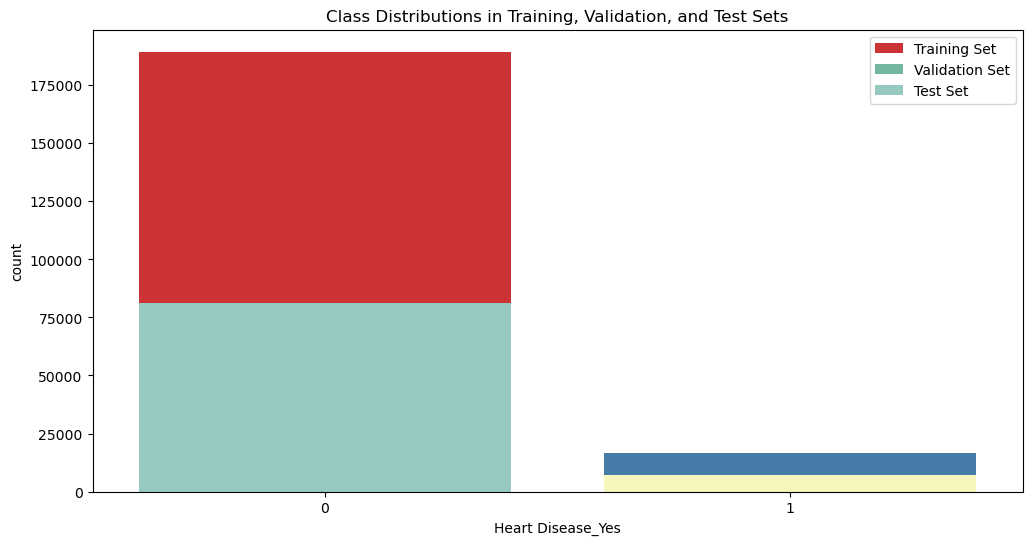

In [128]:
# Plot the class distributions
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train_val, label='Training Set', palette='Set1')
sns.countplot(x=y_val, label='Validation Set', palette='Set2')
sns.countplot(x=y_test, label='Test Set', palette='Set3')
plt.title('Class Distributions in Training, Validation, and Test Sets')
plt.legend()
plt.show()

In [129]:
# use randomoversampler for oversampling
RanOver = RandomOverSampler(random_state=1)
# we create two new matrix for the resample of oversampling and the resampled of undersampling
X_train_resampled_ro, y_train_resampled_ro = RanOver.fit_resample(X_test, y_test)

# we repeat the process for undersampling
RanUnder = RandomUnderSampler(random_state=1)
X_train_resampled_ru, y_train_resampled_ru = RanUnder.fit_resample(X_test, y_test)

# We print the results for datasize for oversampling and undersampling
print("Oversampling dataset:", X_train_resampled_ro.shape[0])
print("Undersampling dataset", X_train_resampled_ru.shape[0])

Oversampling dataset: 162358
Undersampling dataset 14224


### 4. Implement a machine learning algorithm and statistically prove which of the two techniques researched in point 2 improves the prediction. To statistically prove this point, you must define the null and alternative hypothesis (Ho, Ha) , test statistic, calculate Pvalue, and draw a conclusion (revise your notes/lectures from Statics class, and select an appropriate test). In the presentation and report the statistical method applied needs to be clearly explained. 

In [130]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns

Oversampler

In [131]:
# import library to calculate the score of the logistic regression.
from sklearn.metrics import accuracy_score
# create the model
logreg = LogisticRegression()

# we fit the model we the data of oversampling 
logreg.fit(X_train_resampled_ro, y_train_resampled_ro)

# predict the y value for oversampling
y_pred_ro = logreg.predict(X_test)

# calculate the probability of class 1 meaning they do have a heart disease
y_pred_probs_ro = logreg.predict_proba(X_test)[:, 1]

# we display the first 10 probabilities of the model
print(y_pred_probs_ro[:10])

# we calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_ro)

# we print the results
print('Accuracy:', accuracy)

[0.64155858 0.10750548 0.24506464 0.44809383 0.09500847 0.41678313
 0.09193395 0.26840944 0.1275991  0.79800465]
Accuracy: 0.7402906298490219


C:\Users\enlop\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


UnderSampler

In [132]:
# We repeat the process for undersampling
logreg = LogisticRegression()

logreg.fit(X_train_resampled_ru, y_train_resampled_ru)

y_pred_ru = logreg.predict(X_test)

y_pred_probs_ru = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs_ru[:10])

accuracy = accuracy_score(y_test, y_pred_ru)

print('Accuracy:', accuracy)

[0.62588003 0.09396873 0.24449741 0.43955    0.08375946 0.46957332
 0.06756654 0.23180838 0.13206804 0.81162012]
Accuracy: 0.7481736530337181


C:\Users\enlop\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Statistic Test - Friedman Chi Square test for accuracy

In [133]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from scipy.stats import friedmanchisquare
from sklearn.neighbors import KNeighborsClassifier

# First we define the KNN model and the number of folds
model = KNeighborsClassifier(n_neighbors=6)
n_folds = 5

# Then we define the Random Over Sampler and Random Under Sampler objects
over_sampler = RandomOverSampler()
under_sampler = RandomUnderSampler()

# We now entered the oversampling and undersampling technique to evaluate
X_ros, y_ros = over_sampler.fit_resample(X_val, y_val)
X_rus, y_rus = under_sampler.fit_resample(X_val, y_val)

# Perform cross-validation on the models trained on the balanced data
ros_scores = cross_val_score(model, X_ros, y_ros, cv=n_folds, scoring='accuracy')
rus_scores = cross_val_score(model, X_rus, y_rus, cv=n_folds, scoring='accuracy')
orig_scores = cross_val_score(model, X_val, y_val, cv=n_folds, scoring='accuracy')

# Create a list with the scores of each model
scores = [ros_scores, rus_scores, orig_scores]

# Perform the Friedman test to see if there is a significant difference between both techniques
result = friedmanchisquare(*scores)

# Print the results
print(f"Accuracy of Random Over Sampler model: {ros_scores.mean():.3f}")
print(f"Accuracy of Random Under Sampler model: {rus_scores.mean():.3f}")

Accuracy of Random Over Sampler model: 0.870
Accuracy of Random Under Sampler model: 0.519


### 5. Apply at least 4 machine learning algorithms using the best training strategy found in point 4.

In [134]:
# import neccessary libraries
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# Import functions to create decision trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# Import functions to create tree ensembles
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn import tree
from dmba import plotDecisionTree, classificationSummary, regressionSummary

5.1 At least 1 algorithm must be an ensemble. 

In [135]:
# we use the parameter random state so there are not multiple class of the same and avoid a biased model
clf = DecisionTreeClassifier(random_state=42)

# we use clf.fit to fit the model and qualified the variables
clf.fit(X_train_resampled_ro, y_train_resampled_ro)

# we use the qualifier to predict the outcome of the algorithm
y_pred1 = clf.predict(X_test)

# we calculate the accuracy and print the results
accuracy = accuracy_score(y_test, y_pred1)
print("Model accuracy:", accuracy)

Model accuracy: 0.9999886738172634


In [136]:
df_clean.columns

Index(['Height (cm)', 'Weight (kg)', 'BMI', 'Alcohol Consumption',
       'Fruit Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato Consumption', 'General_Health_Fair', 'General_Health_Good',
       'General_Health_Poor', 'General_Health_Very Good', 'Checkup_Never',
       'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years',
       'Checkup_Within the past year', 'Exercise_Yes', 'Heart Disease_Yes',
       'Skin Cancer_Yes', 'Other Cancer_Yes', 'Depression_Yes',
       'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes',
       'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes',
       'Sex_Male', 'Sex_Non-Binary', 'Age Category_25-29',
       'Age Category_30-34', 'Age Category_35-39', 'Age Category_40-44',
       'Age Category_45-49', 'Age Category_50-54', 'Age Category_55-59',
       'Age Category_60-64', 'Age Category_65-69', 'Age Category_70-74',
       'Age Category_75-79', 'Age Category_80+', 'Smoking History_Yes

In [137]:
predictors = df_clean.columns
outcome = 'Heart Disease_Yes'
X = pd.get_dummies(df_clean[predictors], drop_first=True)
y = df_clean[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=0)

train_X.head()

,Height (cm),Weight (kg),BMI,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,...,Age Category_40-44,Age Category_45-49,Age Category_50-54,Age Category_55-59,Age Category_60-64,Age Category_65-69,Age Category_70-74,Age Category_75-79,Age Category_80+,Smoking History_Yes
271785,168,58.97,20.98,0,30.0,20,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
112466,168,99.79,35.51,0,6.0,4,16,0,0,0,...,0,0,1,0,0,0,0,0,0,0
226393,157,78.47,31.64,0,30.0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
190887,155,79.38,33.07,2,12.0,12,6,0,1,0,...,1,0,0,0,0,0,0,0,0,0
18116,152,70.31,30.27,0,28.0,1,4,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [138]:
# The initial model is constant and therefore requires tricks to define the following functions
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Height (cm), Weight (kg), BMI, Alcohol Consumption, Fruit Consumption, Green_Vegetables_Consumption, FriedPotato Consumption, General_Health_Fair, General_Health_Good, General_Health_Poor, General_Health_Very Good, Checkup_Never, Checkup_Within the past 2 years, Checkup_Within the past 5 years, Checkup_Within the past year, Exercise_Yes, Heart Disease_Yes, Skin Cancer_Yes, Other Cancer_Yes, Depression_Yes, Diabetes_No, pre-diabetes or borderline diabetes, Diabetes_Yes, Diabetes_Yes, but female told only during pregnancy, Arthritis_Yes, Sex_Male, Sex_Non-Binary, Age Category_25-29, Age Category_30-34, Age Category_35-39, Age Category_40-44, Age Category_45-49, Age Category_50-54, Age Category_55-59, Age Category_60-64, Age Category_65-69, Age Category_70-74, Age Category_75-79, Age Category_80+, Smoking History_Yes
Start: score=48792.72, constant
Step: score=-11765050.58, add Heart Disease_Yes
Step: score=-11765746.82, add Checkup_Never
Step: score=-11765862.31, add Alcohol C

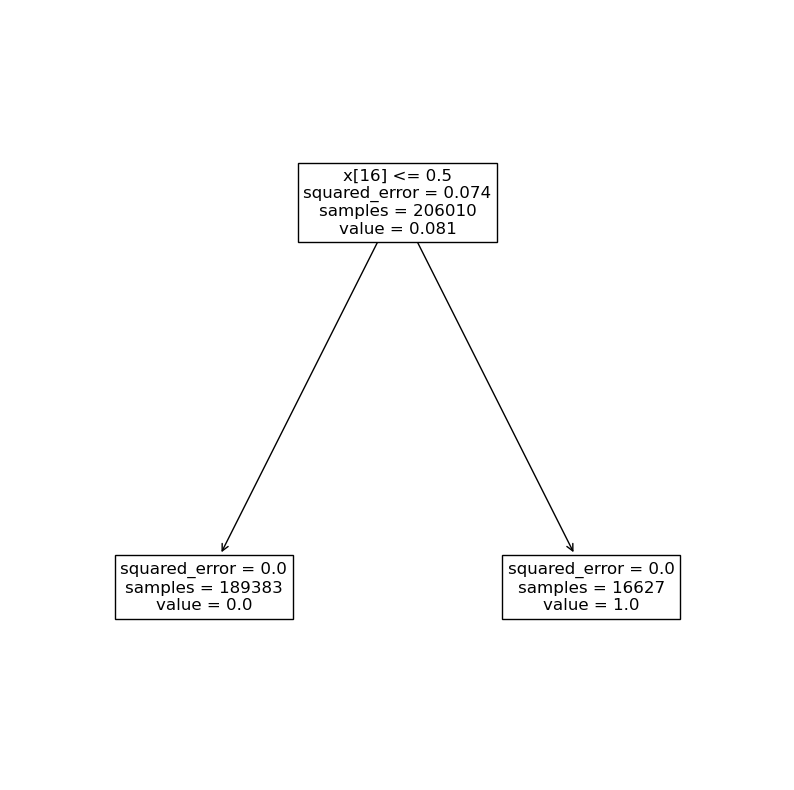

In [40]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

smallClassTree = DecisionTreeRegressor(max_depth=7, 
                    min_samples_split=40, ) 
smallClassTree.fit(train_X, train_y)

plt.figure(figsize=(10,10)) 
tree.plot_tree(smallClassTree, fontsize=12)
plt.show()

5.2 At least 1 algorithm must be a model not seen in class (you must research and understand how the model mathematically works and performs the prediction, include a good description about these points in the presentation and report). 

In [139]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Gradient Boosting

In [42]:
# Crear un modelo y ajustarlo al set de entrenamiento
boost_train_GB = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 4 )
boost_train_GB.fit(X_train_resampled_ro, y_train_resampled_ro)

yo_pred_train_GB = boost_train_GB.predict(X_train_resampled_ro)
accuracy_train_GB = accuracy_score(y_train_resampled_ro, yo_pred_train_GB)
print("Precisión en el set de entrenamiento: ", accuracy_train_GB)

Precisión en el set de entrenamiento:  0.7306815802116311


In [43]:
# Crear un modelo y ajustarlo al set de validacion
boost_val_GB = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 4 )
boost_val_GB.fit(X_val, y_val)

yo_pred_val_GB = boost_val_GB.predict(X_val)
accuracy_val_GB = accuracy_score(y_val, yo_pred_val_GB)
print("Precisión en el set de entrenamiento: ", accuracy_val_GB)

Precisión en el set de entrenamiento:  0.9194352159468439


In [44]:
# Crear un modelo y ajustarlo al set de prueba
boost_test_GB = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 4 )
boost_test_GB.fit(X_test, y_test)

yo_pred_test_GB = boost_test_GB.predict(X_test)
accuracy_test_GB = accuracy_score(y_test, yo_pred_test_GB)
print("Precisión en el set de entrenamiento: ", accuracy_test_GB)

Precisión en el set de entrenamiento:  0.9194481883770713


5.3 For at least 2 algorithms apply a hyperparameter optimization method. Mention the range of values in which the hyperparameters are searched.

In [67]:
#RANDOMIZED SEARCH
# Create a synthetic imbalanced dataset (replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.99], flip_y=0, random_state=1)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train2, y_train2)

# Define the parameter distribution for randomized search
param_dist = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Create a RandomizedSearchCV object
randomized_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model on the resampled data
randomized_search.fit(X_resampled, y_resampled)

# Print the best parameters found by randomized search
print("Best Parameters:", randomized_search.best_params_)

# Make predictions on the test set using the best model
best_svm_model = randomized_search.best_estimator_
y_pred2 = best_svm_model.predict(X_test2)

# Evaluate the performance
print("Classification Report:\n", classification_report(y_test2, y_pred2))
print("Accuracy:", accuracy_score(y_test2, y_pred2))

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       197
           1       0.20      0.67      0.31         3

    accuracy                           0.95       200
   macro avg       0.60      0.81      0.64       200
weighted avg       0.98      0.95      0.97       200

Accuracy: 0.955


In [46]:
#GRID SEARCH
# Load the Iris dataset (replace this with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data with grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
best_tree_model = grid_search.best_estimator_
y_pred = best_tree_model.predict(X_test)

# Evaluate the performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


5.4 For all hyperparameters of the implemented models (and not optimized) justify the
value assigned (read papers or books that provide a recommendation and include the
references in the presentation and report). 

The value assigned to the Support Vector Machine (SVM) algorithm with SVC (Support Vector Classification) in scikit-learn, is often chosen based on empirical testing, heuristics, or sometimes just arbitrary choices. In the context of your question, the value of 42 assigned to hyperparameters, specifically the random_state, is likely chosen for the sake of reproducibility rather than any inherent significance of the number itself. 

### 6. Evaluate each model

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

Gradient Booster

In [48]:
confusion_matrix_GB_train = confusion_matrix(y_train_resampled_ro, yo_pred_train_GB)
print('Training set confusion matrix')
print(confusion_matrix_GB_train)

Training set confusion matrix
[[57903 23276]
 [20450 60729]]


In [49]:
# generar matriz de confusión
confusion_matrix_GB_val = confusion_matrix(y_val, yo_pred_val_GB)
print('Validation set confusion matrix')
print(confusion_matrix_GB_val)

Validation set confusion matrix
[[24354     0]
 [ 2134     0]]


In [1]:
from sklearn.metrics import confusion_matrix

# Assuming yo_pred_test_GB is the predicted labels for your test set

# Ensure both arrays have the same number of samples
y_test = y_test[:len(yo_pred_test_GB)]

# Generate confusion matrix
confusion_matrix_GB_test = confusion_matrix(y_test, yo_pred_test_GB)

print(confusion_matrix_GB_test)

NameError: name 'y_test' is not defined

In [56]:
# valores de la matriz de confusión
tn_train_GB, fp_train_GB, fn_train_GB, tp_train_GB = confusion_matrix_GB_train.ravel()

# calcular la exactitud
accuracy_train_GB = (tp_train_GB + tn_train_GB) / (tp_train_GB + tn_train_GB + fp_train_GB + fn_train_GB)

# calcular la sensibilidad (recall o true positive rate)
sensitivity_train_GB = tp_train_GB / (tp_train_GB + fn_train_GB)

# calcular la especificidad (true negative rate)
specificity_train_GB = tn_train_GB / (tn_train_GB + fp_train_GB)

# calcular la precisión
precision_train_GB = tp_train_GB / (tp_train_GB + fp_train_GB)

# imprimir los resultados
print("Accuracy:", accuracy_train_GB)
print("Sensibility:", sensitivity_train_GB)
print("Specifitivity:", specificity_train_GB)
print("Precission:", precision_train_GB)

Accuracy: 0.7306815802116311
Sensibility: 0.7480875595905345
Specifitivity: 0.7132756008327277
Precission: 0.722921254687221


In [57]:
# valores de la matriz de confusión
tn_val_GB, fp_val_GB, fn_val_GB, tp_val_GB = confusion_matrix_GB_val.ravel()

# calcular la exactitud
accuracy_val_GB = (tp_val_GB + tn_val_GB) / (tp_val_GB + tn_val_GB + fp_val_GB + fn_val_GB)

# calcular la sensibilidad (recall o true positive rate)
sensitivity_val_GB = tp_val_GB / (tp_val_GB + fn_val_GB)

# calcular la especificidad (true negative rate)
specificity_val_GB = tn_val_GB / (tn_val_GB + fp_val_GB)

# calcular la precisión
precision_val_GB = tp_val_GB / (tp_val_GB + fp_val_GB)

# imprimir los resultados
print("Accuracy:", accuracy_val_GB)
print("Sensibility:", sensitivity_val_GB)
print("Specifitivity:", specificity_val_GB)
print("Precission:", precision_val_GB)

Accuracy: 0.9194352159468439
Sensibility: 0.0
Specifitivity: 1.0
Precission: nan


C:\Users\enlop\AppData\Local\Temp\ipykernel_6640\1848439823.py:14: RuntimeWarning: invalid value encountered in scalar divide
  precision_val_GB = tp_val_GB / (tp_val_GB + fp_val_GB)


In [54]:
# valores de la matriz de confusión
tn_test_GB, fp_test_GB, fn_test_GB, tp_test_GB = confusion_matrix_GB_test.ravel()

# calcular la exactitud
accuracy_test_GB = (tp_test_GB + tn_test_GB) / (tp_test_GB + tn_test_GB + fp_test_GB + fn_test_GB)

# calcular la sensibilidad (recall o true positive rate)
sensitivity_test_GB = tp_test_GB / (tp_test_GB + fn_test_GB)

# calcular la especificidad (true negative rate)
specificity_test_GB = tn_test_GB/ (tn_test_GB + fp_test_GB)

# calcular la precisión
precision_test_GB = tp_test_GB / (tp_test_GB + fp_test_GB)

# imprimir los resultados
print("Accuracy:", accuracy_test_GB)
print("Sensibility:", sensitivity_test_GB)
print("Specifitivity:", specificity_test_GB)
print("Precisson:", precision_test_GB)

NameError: name 'confusion_matrix_GB_test' is not defined

In [58]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: las clases reales (0,1) o (-1,1)
# y_score: probabilidades que se utilizaran para clasificar las observaciones
# retorna false positive rate (fpr), true positive rate (tpr), y el threshold para esos valores 
fpr_GB_train, tpr_GB_train, _ = roc_curve(y_true= y_train_resampled_ro, y_score=yo_pred_train_GB)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_GB_train = auc(x=fpr_GB_train, y=tpr_GB_train)
print(roc_auc_GB_train)

0.7306815802116311


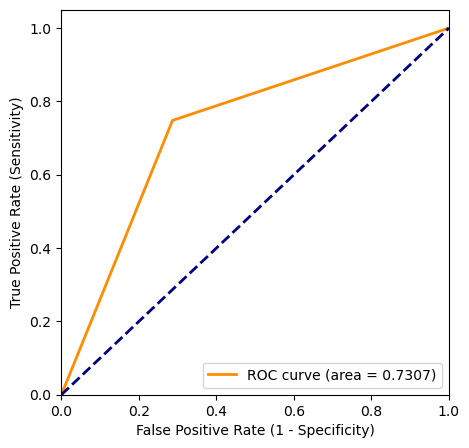

In [59]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#agrega ROC
plt.plot(fpr_GB_train, tpr_GB_train, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_GB_train)
#agrega el random guess
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [60]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: las clases reales (0,1) o (-1,1)
# y_score: probabilidades que se utilizaran para clasificar las observaciones
# retorna false positive rate (fpr), true positive rate (tpr), y el threshold para esos valores 
fpr_GB_val, tpr_GB_val, _ = roc_curve(y_true= y_val, y_score=yo_pred_val_GB)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_GB_val = auc(x=fpr_GB_val, y=tpr_GB_val)
print(roc_auc_GB_val)

0.5


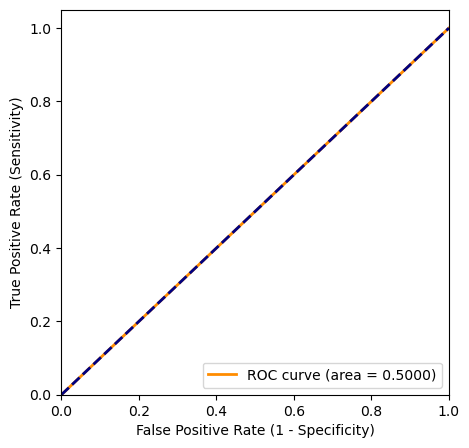

In [61]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#agrega ROC
plt.plot(fpr_GB_val, tpr_GB_val, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_GB_val)
#agrega el random guess
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [229]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# roc_curve: Compute Receiver operating characteristic (ROC).
# y_true: las clases reales (0,1) o (-1,1)
# y_score: probabilidades que se utilizaran para clasificar las observaciones
# retorna false positive rate (fpr), true positive rate (tpr), y el threshold para esos valores 
fpr_GB_test, tpr_GB_test, _ = roc_curve(y_true= y_test, y_score=yo_pred_test_GB)
# calcula el area under the curve
# envia las coordinadas en x y y 
roc_auc_GB_test = auc(x=fpr_GB_test, y=tpr_GB_test)
print(roc_auc_GB_test)

0.5


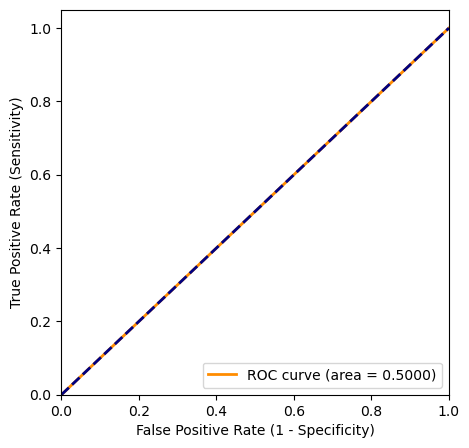

In [230]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#agrega ROC
plt.plot(fpr_GB_test, tpr_GB_test, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_GB_test)
#agrega el random guess
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

Decision tree

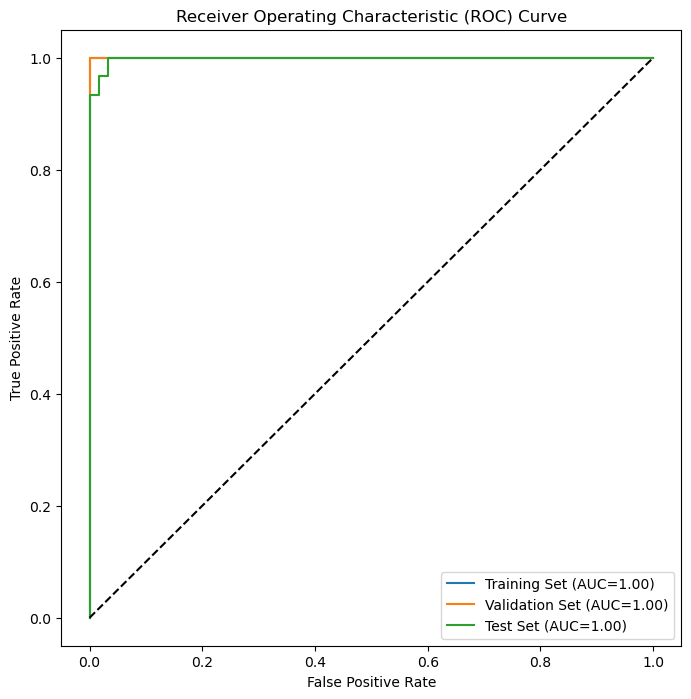

Confusion Matrix (Training Set):
 [[27  0  0]
 [ 0 31  0]
 [ 0  0 32]]
Accuracy (Training Set): 1.0
Precision (Training Set): 1.0
Recall (Training Set): 1.0
AUC (Training Set): 1.0

Confusion Matrix (Validation Set):
 [[12  0  0]
 [ 0  6  0]
 [ 0  0 12]]
Accuracy (Validation Set): 1.0
Precision (Validation Set): 1.0
Recall (Validation Set): 1.0
AUC (Validation Set): 1.0

Confusion Matrix (Test Set):
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy (Test Set): 0.9666666666666667
Precision (Test Set): 0.9690476190476189
Recall (Test Set): 0.9666666666666667
AUC (Test Set): 0.9966503267973856


In [63]:
# generar matriz de confusión
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training set
gb_classifier.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = gb_classifier.predict(X_train)

# Predictions on the validation set
y_val_pred = gb_classifier.predict(X_val)

# Predictions on the test set
y_test_pred = gb_classifier.predict(X_test)

def calculate_auc_roc(y_true, y_proba, set_name):
    unique_classes = np.unique(y_true)
    
    if len(unique_classes) < 2:
        print(f"Skipping AUC calculation for {set_name} set as there is only one class.")
        return None, None, None
    
    auc = roc_auc_score(np.eye(len(unique_classes))[y_true], y_proba, multi_class='ovr', average='weighted')

    fpr, tpr, _ = roc_curve(np.eye(len(unique_classes))[y_true].ravel(), y_proba.ravel())
    return auc, fpr, tpr

# AUC and ROC Curve for Training Set
auc_train, fpr_train, tpr_train = calculate_auc_roc(y_train, gb_classifier.predict_proba(X_train), "Training")

# AUC and ROC Curve for Validation Set
auc_val, fpr_val, tpr_val = calculate_auc_roc(y_val, gb_classifier.predict_proba(X_val), "Validation")

# AUC and ROC Curve for Test Set
auc_test, fpr_test, tpr_test = calculate_auc_roc(y_test, gb_classifier.predict_proba(X_test), "Test")

# Plot ROC Curves
plt.figure(figsize=(8, 8))
if auc_train is not None:
    plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC={auc_train:.2f})')
if auc_val is not None:
    plt.plot(fpr_val, tpr_val, label=f'Validation Set (AUC={auc_val:.2f})')
if auc_test is not None:
    plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC={auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Print the results
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_train_pred))
print("Accuracy (Training Set):", accuracy_score(y_train, y_train_pred))
print("Precision (Training Set):", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall (Training Set):", recall_score(y_train, y_train_pred, average='weighted'))
if auc_train is not None:
    print("AUC (Training Set):", auc_train)

print("\nConfusion Matrix (Validation Set):\n", confusion_matrix(y_val, y_val_pred))
print("Accuracy (Validation Set):", accuracy_score(y_val, y_val_pred))
print("Precision (Validation Set):", precision_score(y_val, y_val_pred, average='weighted'))
print("Recall (Validation Set):", recall_score(y_val, y_val_pred, average='weighted'))
if auc_val is not None:
    print("AUC (Validation Set):", auc_val)

print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy (Test Set):", accuracy_score(y_test, y_test_pred))
print("Precision (Test Set):", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall (Test Set):", recall_score(y_test, y_test_pred, average='weighted'))
if auc_test is not None:
    print("AUC (Test Set):", auc_test)

Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)
y_test_pred = rf_classifier.predict(X_test)


Confusion Matrix for Training Set:
[[27  0  0]
 [ 0 31  0]
 [ 0  0 32]]


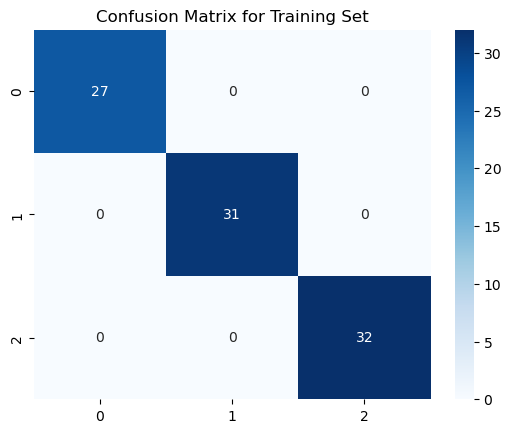

Confusion Matrix for Validation Set:
[[12  0  0]
 [ 0  6  0]
 [ 0  0 12]]


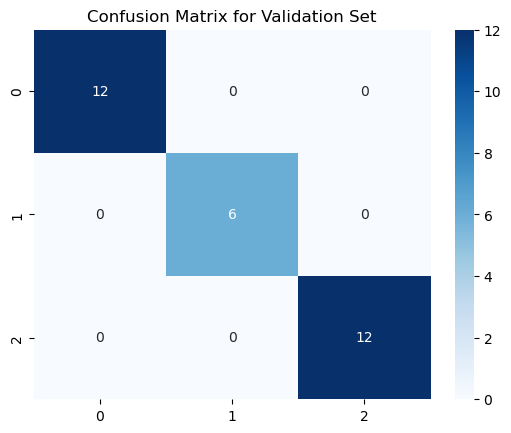

Confusion Matrix for Test Set:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


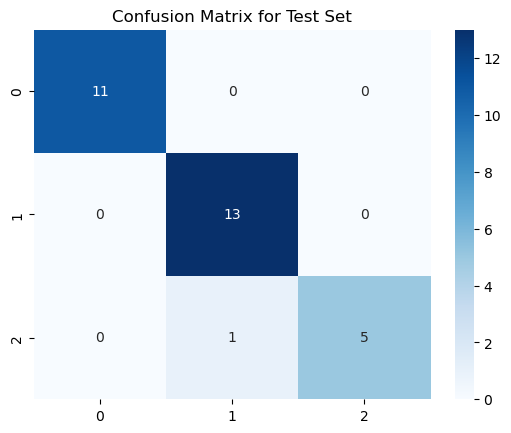

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix_for_set(set_name, X_set, y_set):
    # Make predictions
    y_pred = rf_classifier.predict(X_set)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_set, y_pred)
    print(f"Confusion Matrix for {set_name}:")
    print(conf_matrix)

    # Plot Confusion Matrix with seaborn
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {set_name}')
    plt.show()

# Plot confusion matrices for each set
plot_confusion_matrix_for_set("Training Set", X_train, y_train)
plot_confusion_matrix_for_set("Validation Set", X_val, y_val)
plot_confusion_matrix_for_set("Test Set", X_test, y_test)

In [90]:
from sklearn.metrics import confusion_matrix

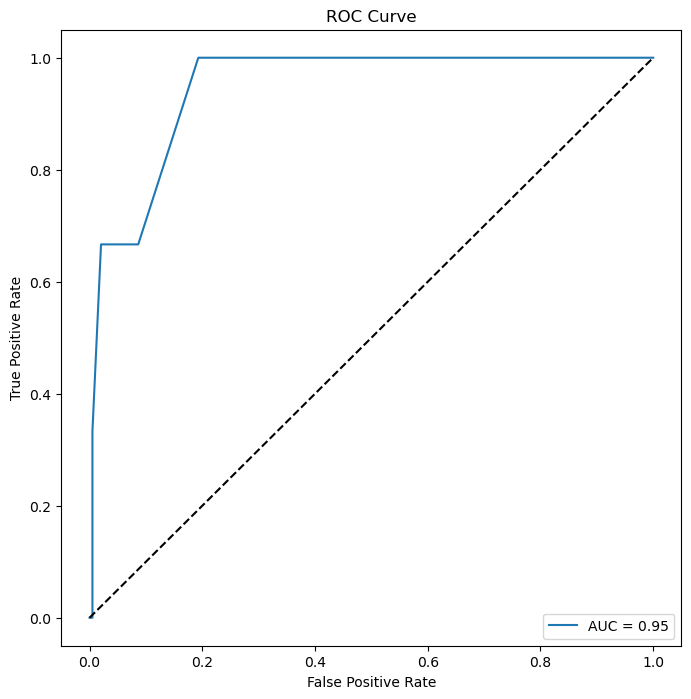

Confusion Matrix:
 [[188   9]
 [  1   2]]
Accuracy: 0.95
Precision: 0.18181818181818182
Sensitivity (Recall): 0.6666666666666666
Specificity: 0.9543147208121827
AUC: 0.9475465313028765


In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.99], flip_y=0, random_state=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a Random UnderSampler to balance the class distribution
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Using a Random Forest classifier
classifier = RandomForestClassifier()  
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
# Fit the grid search on your resampled data
grid_search.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall (Sensitivity)
sensitivity = recall_score(y_test, y_pred)

# Specificity
# Specificity = True Negative Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# AUC and ROC Curve
y_proba = grid_search.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("AUC:", auc)

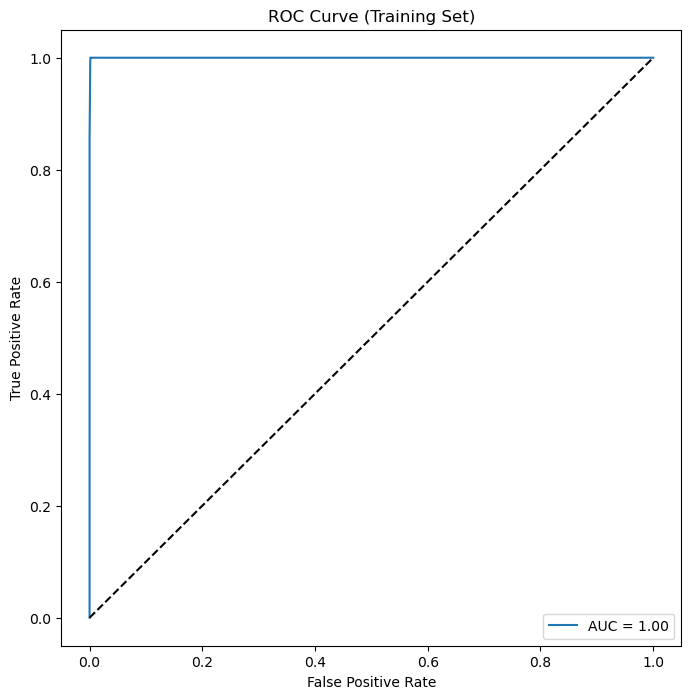

Confusion Matrix (Training Set):
 [[792   1]
 [  0   7]]
Accuracy (Training Set): 0.99875
Precision (Training Set): 0.875
Sensitivity (Recall) (Training Set): 1.0
Specificity (Training Set): 0.9987389659520807
AUC (Training Set): 0.9999099261394344


In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.99], flip_y=0, random_state=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a Random UnderSampler to balance the class distribution for training set
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_train, y_resampled_train = rus.fit_resample(X_train, y_train)

# Using a Random Forest classifier
classifier = RandomForestClassifier()  
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
# Fit the grid search on your resampled training data
grid_search.fit(X_resampled_train, y_resampled_train)

# Make predictions on the training set
y_pred_train = grid_search.predict(X_train)

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Accuracy for training set
accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision for training set
precision_train = precision_score(y_train, y_pred_train)

# Recall (Sensitivity) for training set
sensitivity_train = recall_score(y_train, y_pred_train)

# Specificity for training set
# Specificity = True Negative Rate
specificity_train = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])

# AUC and ROC Curve for training set
y_proba_train = grid_search.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_proba_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)

# Plot ROC Curve for training set
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, label=f'AUC = {auc_train:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend()
plt.show()

# Print the results for training set
print("Confusion Matrix (Training Set):\n", conf_matrix_train)
print("Accuracy (Training Set):", accuracy_train)
print("Precision (Training Set):", precision_train)
print("Sensitivity (Recall) (Training Set):", sensitivity_train)
print("Specificity (Training Set):", specificity_train)
print("AUC (Training Set):", auc_train)

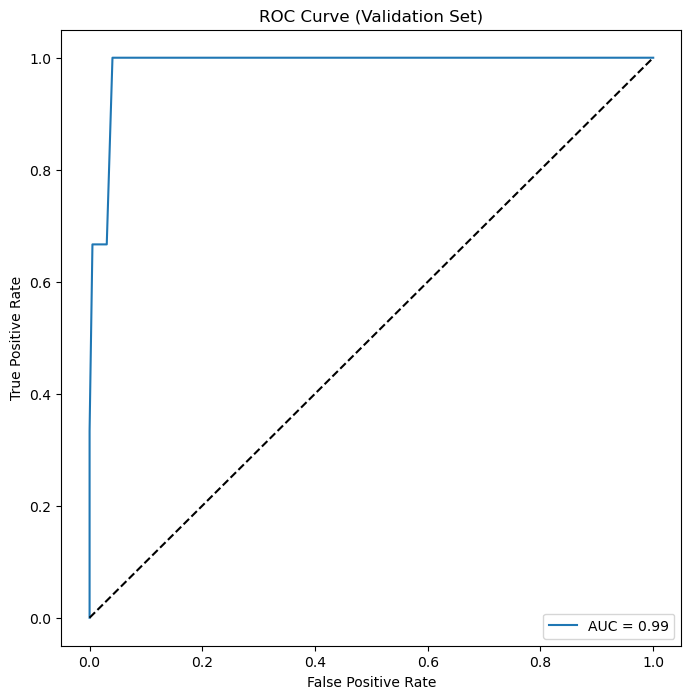

Confusion Matrix (Validation Set):
 [[194   3]
 [  1   2]]
Accuracy (Validation Set): 0.98
Precision (Validation Set): 0.4
Sensitivity (Recall) (Validation Set): 0.6666666666666666
Specificity (Validation Set): 0.9847715736040609
AUC (Validation Set): 0.9873096446700508


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.99], flip_y=0, random_state=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a Random UnderSampler to balance the class distribution for training set
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_train, y_resampled_train = rus.fit_resample(X_train, y_train)

# Using a Random Forest classifier
classifier = RandomForestClassifier()  
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
# Fit the grid search on your resampled training data
grid_search.fit(X_resampled_train, y_resampled_train)

# Make predictions on the validation set
y_pred_val = grid_search.predict(X_test)

# Confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_test, y_pred_val)

# Accuracy for validation set
accuracy_val = accuracy_score(y_test, y_pred_val)

# Precision for validation set
precision_val = precision_score(y_test, y_pred_val)

# Recall (Sensitivity) for validation set
sensitivity_val = recall_score(y_test, y_pred_val)

# Specificity for validation set
# Specificity = True Negative Rate
specificity_val = conf_matrix_val[0, 0] / (conf_matrix_val[0, 0] + conf_matrix_val[0, 1])

# AUC and ROC Curve for validation set
y_proba_val = grid_search.predict_proba(X_test)[:, 1]
auc_val = roc_auc_score(y_test, y_proba_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, y_proba_val)

# Plot ROC Curve for validation set
plt.figure(figsize=(8, 8))
plt.plot(fpr_val, tpr_val, label=f'AUC = {auc_val:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')
plt.legend()
plt.show()

# Print the results for validation set
print("Confusion Matrix (Validation Set):\n", conf_matrix_val)
print("Accuracy (Validation Set):", accuracy_val)
print("Precision (Validation Set):", precision_val)
print("Sensitivity (Recall) (Validation Set):", sensitivity_val)
print("Specificity (Validation Set):", specificity_val)
print("AUC (Validation Set):", auc_val)

Grid Search

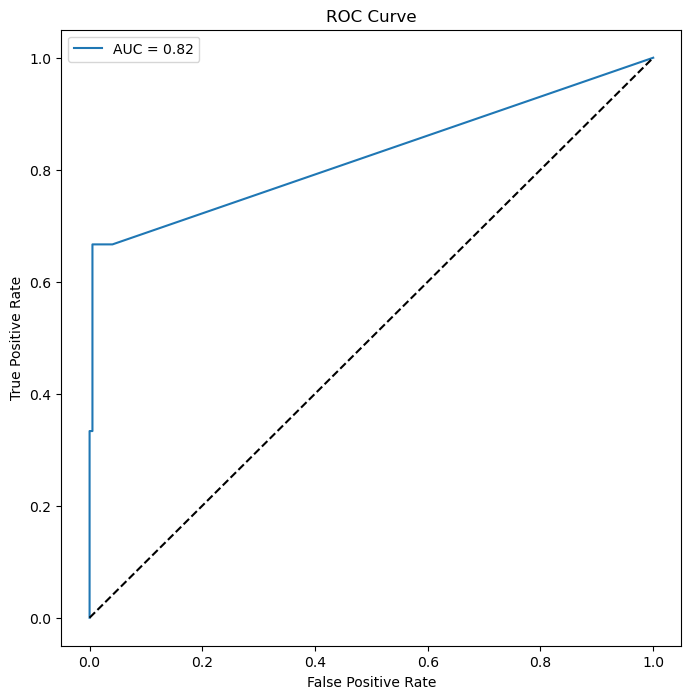

Confusion Matrix:
 [[197   0]
 [  2   1]]
Accuracy: 0.99
Precision: 1.0
Sensitivity (Recall): 0.3333333333333333
Specificity: 1.0
AUC: 0.8248730964467004


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.99], flip_y=0, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#using a Random Forest classifier:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()  # Replace with your actual classifier
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
# Fit the grid search on your data
grid_search.fit(X_train, y_train)

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall (Sensitivity)
sensitivity = recall_score(y_test, y_pred)

# Specificity
# Specificity = True Negative Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# AUC and ROC Curve
y_proba = grid_search.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("AUC:", auc)

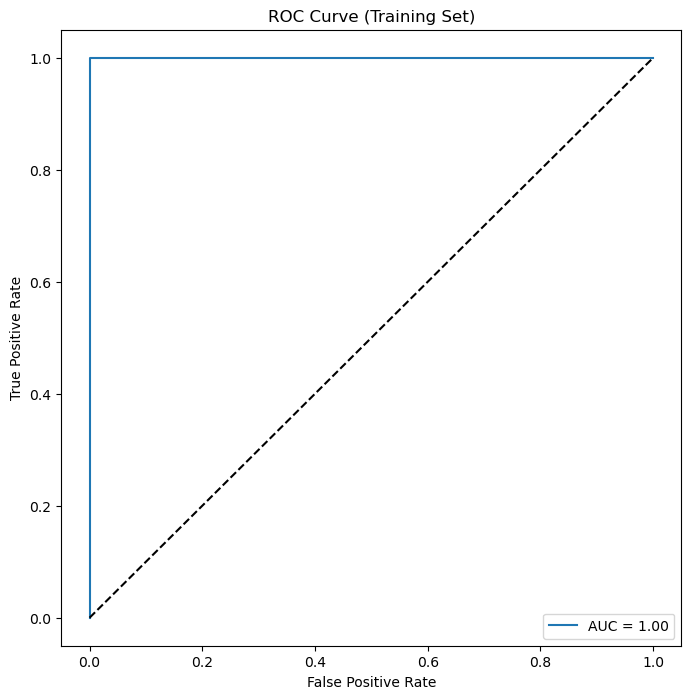

Confusion Matrix (Training Set):
 [[793   0]
 [  0   7]]
Accuracy (Training Set): 1.0
Precision (Training Set): 1.0
Sensitivity (Recall) (Training Set): 1.0
Specificity (Training Set): 1.0
AUC (Training Set): 1.0


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.99], flip_y=0, random_state=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()  # Replace with your actual classifier
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
# Fit the grid search on your data
grid_search.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = grid_search.predict(X_train)

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Precision for training set
precision_train = precision_score(y_train, y_train_pred)

# Recall (Sensitivity) for training set
sensitivity_train = recall_score(y_train, y_train_pred)

# Specificity for training set
# Specificity = True Negative Rate
specificity_train = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])

# AUC and ROC Curve for training set
y_proba_train = grid_search.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_proba_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)

# Plot ROC Curve for training set
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, label=f'AUC = {auc_train:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend()
plt.show()

# Print the results for training set
print("Confusion Matrix (Training Set):\n", conf_matrix_train)
print("Accuracy (Training Set):", accuracy_train)
print("Precision (Training Set):", precision_train)
print("Sensitivity (Recall) (Training Set):", sensitivity_train)
print("Specificity (Training Set):", specificity_train)
print("AUC (Training Set):", auc_train)

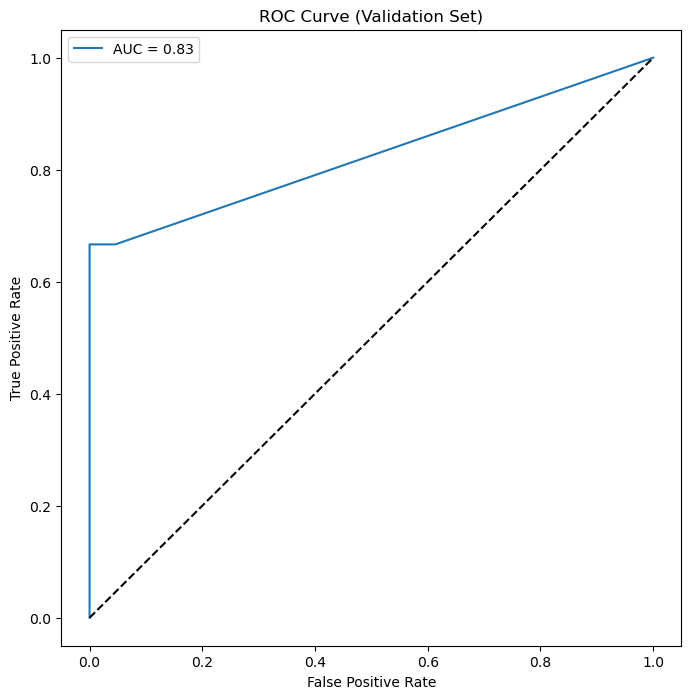

Confusion Matrix (Validation Set):
 [[195   2]
 [  1   2]]
Accuracy (Validation Set): 0.985
Precision (Validation Set): 0.5
Sensitivity (Recall) (Validation Set): 0.6666666666666666
Specificity (Validation Set): 0.9898477157360406
AUC (Validation Set): 0.8257191201353636


In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.99], flip_y=0, random_state=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()  # Replace with your actual classifier
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
# Fit the grid search on your data
grid_search.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = grid_search.predict(X_test)

# Confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_test, y_val_pred)

# Accuracy for validation set
accuracy_val = accuracy_score(y_test, y_val_pred)

# Precision for validation set
precision_val = precision_score(y_test, y_val_pred)

# Recall (Sensitivity) for validation set
sensitivity_val = recall_score(y_test, y_val_pred)

# Specificity for validation set
# Specificity = True Negative Rate
specificity_val = conf_matrix_val[0, 0] / (conf_matrix_val[0, 0] + conf_matrix_val[0, 1])

# AUC and ROC Curve for validation set
y_proba_val = grid_search.predict_proba(X_test)[:, 1]
auc_val = roc_auc_score(y_test, y_proba_val)
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, y_proba_val)

# Plot ROC Curve for validation set
plt.figure(figsize=(8, 8))
plt.plot(fpr_val, tpr_val, label=f'AUC = {auc_val:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')
plt.legend()
plt.show()

# Print the results for validation set
print("Confusion Matrix (Validation Set):\n", conf_matrix_val)
print("Accuracy (Validation Set):", accuracy_val)
print("Precision (Validation Set):", precision_val)
print("Sensitivity (Recall) (Validation Set):", sensitivity_val)
print("Specificity (Validation Set):", specificity_val)
print("AUC (Validation Set):", auc_val)